<a href="https://colab.research.google.com/github/thepankaj018/EDA-Hotel-Booking/blob/main/EDA_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing Essential Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
file_path = '/content/drive/MyDrive/hotel_bookings.csv'
df= pd.read_csv(file_path)

# Data Exploration

In [ ]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
84532,City Hotel,0,12,2016,February,9,27,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,108.0,0,1,Check-Out,2/28/2016
116088,City Hotel,0,414,2017,July,28,13,0,2,2,0.0,0,HB,DEU,Groups,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient-Party,122.4,0,1,Check-Out,7/15/2017
3663,Resort Hotel,0,165,2015,December,53,30,0,4,2,0.0,0,Undefined,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,308.0,NaN,122,Transient-Party,136.5,0,0,Check-Out,1/3/2016
1363,Resort Hotel,1,93,2015,August,35,26,1,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,192.2,0,0,Canceled,7/10/2015
97684,City Hotel,0,315,2016,September,38,17,1,1,2,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,NaN,38,Transient-Party,65.0,0,1,Check-Out,9/19/2016


In [ ]:
df['hotel'][0]

'Resort Hotel'

In [ ]:
print(f'number of rows are {df.shape[0]}')
print (f'number of columns are {df.shape[1]}')

number of rows are 119390
number of columns are 32


In [ ]:
# checking data types of each columns
d_types = df.dtypes.reset_index().rename(columns = {'index':'columns',0:'data_types'})
d_types

,columns,data_types
0,hotel,object
1,is_canceled,int64
2,lead_time,int64
3,arrival_date_year,int64
4,arrival_date_month,object
5,arrival_date_week_number,int64
6,arrival_date_day_of_month,int64
7,stays_in_weekend_nights,int64
8,stays_in_week_nights,int64
9,adults,int64


### Data Description:

1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel*

In [ ]:
# converting object type to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

## Data Cleaning

In [ ]:
# checking duplicates value
print(f'Duplicates values in dataframe are {df.duplicated().sum()}')

Duplicates values in dataframe are 31994


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
print(f'Now duplicates values in dataframe are {df.duplicated().sum()}')

Now duplicates values in dataframe are 0


In [ ]:
# Checking NULL values in dataframe
null_df = df.isnull().sum().sort_values(ascending = False).reset_index().rename(columns = {'index':'columns',0:'NULL Values'}).iloc[:6,:]
null_df['percent_null'] = (null_df['NULL Values']*100)/len(df)
null_df


,columns,NULL Values,percent_null
0,company,82137,93.982562
1,agent,12193,13.951439
2,country,452,0.517186
3,children,4,0.004577
4,reserved_room_type,0,0.000000
5,assigned_room_type,0,0.000000


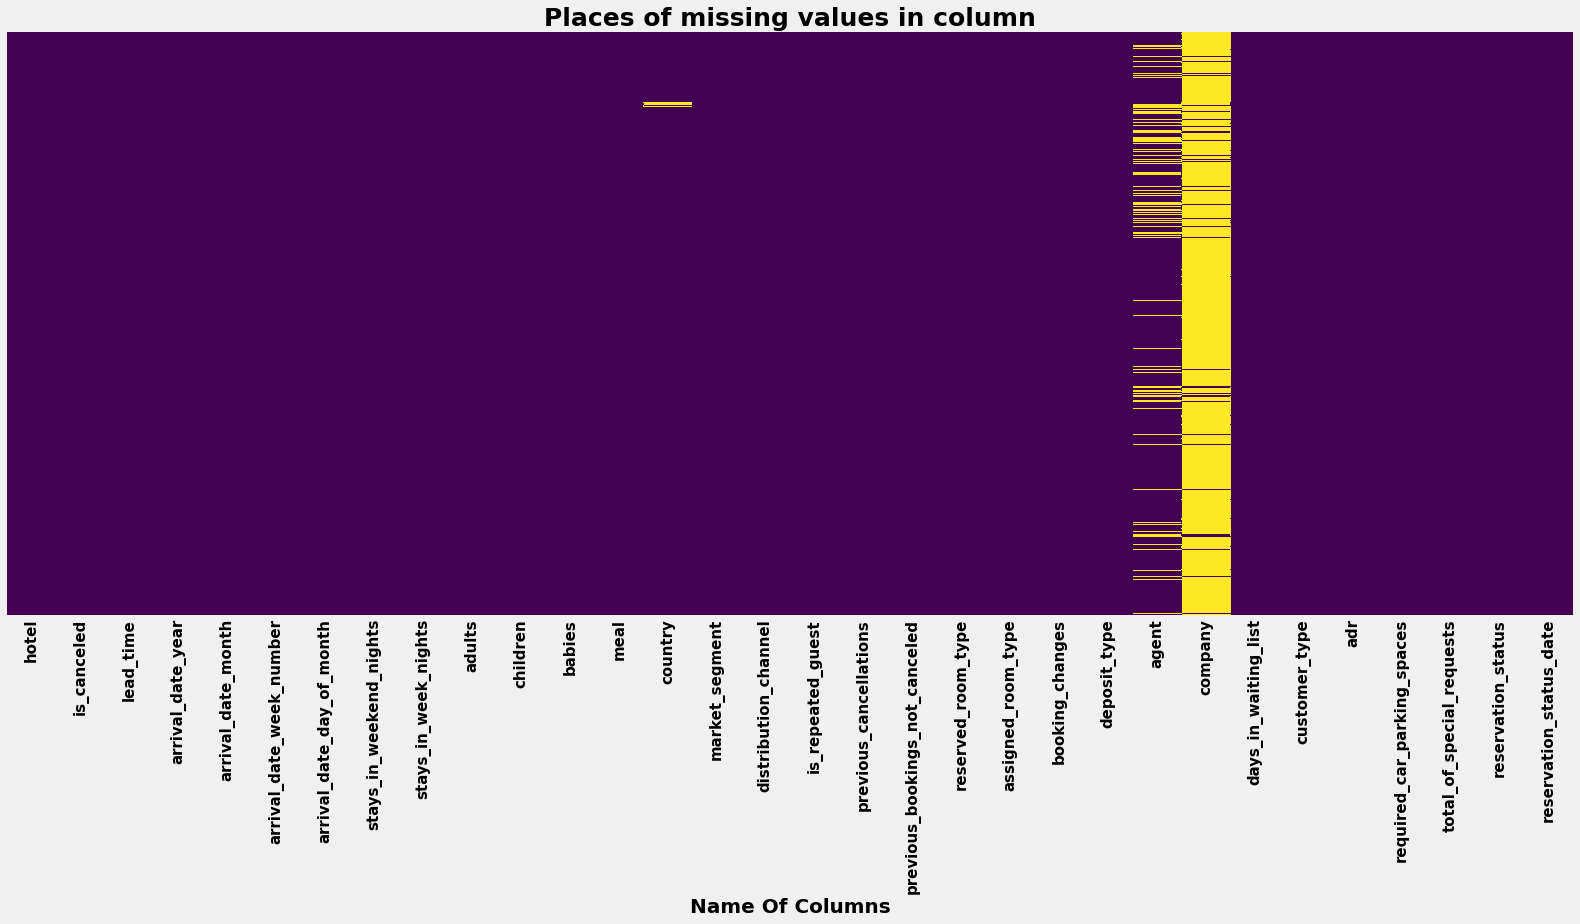

In [ ]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column");

In [ ]:
# Droping Country columns because more than 93 percent values are missing
df.drop(columns = ['company'],inplace = True)

In [ ]:
# filling NULL Values in agent columns with ZERO(0)
df['agent'].fillna(value = 0,inplace = True)

In [ ]:
# filling NULL values in country columns with others
df['country'].replace(np.NaN,'others',inplace = True)

In [ ]:
# filling NULL values in children columns with ZERO(0)
df['children'].fillna(0,inplace = True)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# droppping all those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
df = df[df['adults'] + df['children'] + df['babies'] != 0]

In [ ]:
categorical = list(set(df.columns)-set(df.describe().columns))
categorical

['deposit_type',
 'distribution_channel',
 'country',
 'market_segment',
 'reserved_room_type',
 'arrival_date_month',
 'reservation_status',
 'hotel',
 'meal',
 'reservation_status_date',
 'assigned_room_type',
 'customer_type']

In [ ]:
numerical = list(set(df.columns)-set(categorical))
numerical

['babies',
 'previous_bookings_not_canceled',
 'lead_time',
 'booking_changes',
 'is_canceled',
 'stays_in_weekend_nights',
 'arrival_date_week_number',
 'total_of_special_requests',
 'is_repeated_guest',
 'required_car_parking_spaces',
 'agent',
 'arrival_date_year',
 'children',
 'previous_cancellations',
 'stays_in_week_nights',
 'arrival_date_day_of_month',
 'adr',
 'days_in_waiting_list',
 'adults']

In [ ]:
df.shape[1]

31

In [ ]:
len(categorical) + len(numerical)

31

In [ ]:
# Checking the unique values in categorical columns.
for elem in categorical:
  if elem in ['arrival_date_month','reservation_status_date','country']:
    continue
  else:
    print(f'Unique values in {elem} are {df[elem].unique()}')  

Unique values in deposit_type are ['No Deposit' 'Refundable' 'Non Refund']
Unique values in distribution_channel are ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in market_segment are ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in reserved_room_type are ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in reservation_status are ['Check-Out' 'Canceled' 'No-Show']
Unique values in hotel are ['Resort Hotel' 'City Hotel']
Unique values in meal are ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in assigned_room_type are ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in customer_type are ['Transient' 'Contract' 'Transient-Party' 'Group']


In [ ]:
# Now doing some feature construction.
df['total_people'] = df['adults'] + df['children'] + df['babies']
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [ ]:
df.shape

(87230, 33)

#EDA (Exploratory Data Analysis)

# Univariate Analysis

#1) Which type of hotel is mostly prefered by the guests?

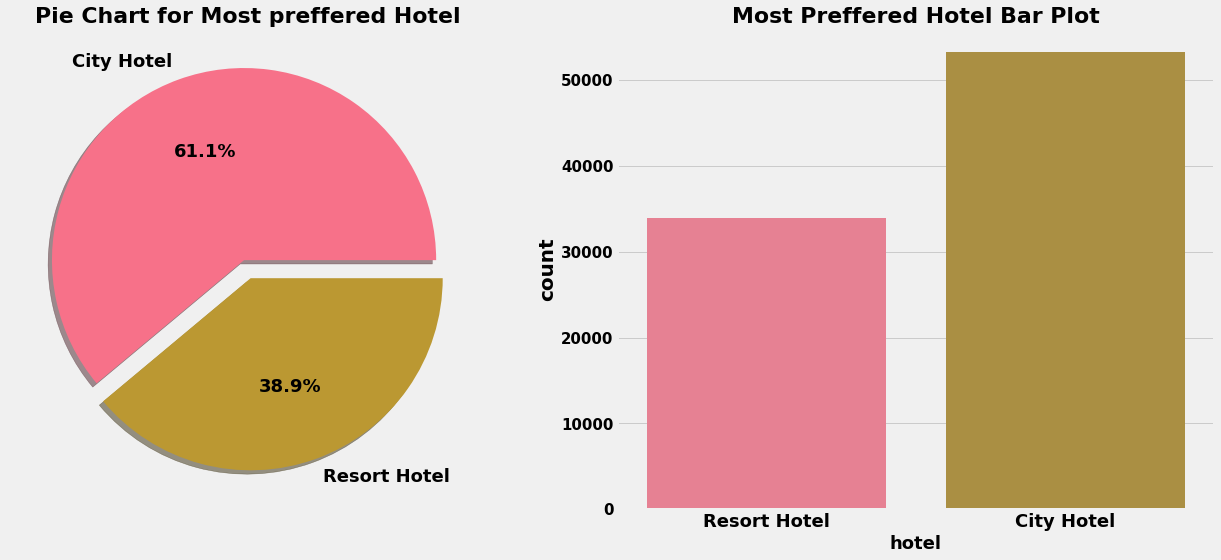

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['hotel'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Pie Chart for Most preffered Hotel', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('hotel',data=df,ax=ax[1])
ax[1].set_title('Most Preffered Hotel Bar Plot',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("hotel",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

### **Observation**
### City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

#2) Which Agent made the most bookings?

In [ ]:
df['agent'].unique()

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
df['agent'].dtypes

dtype('float64')

In [ ]:
# converting from float datatypes to integer.
df['agent'] = df['agent'].astype('int64')

In [ ]:
# return highest bookings made by agents
highest_booking = df.groupby('agent')['agent'].agg({'count'}).reset_index().rename(columns = {'count':'Most_bookings'}).sort_values(by = 'Most_bookings',ascending = False)

# Zero(0) in agent column means booking is not made by the agent and hence removing 0 from agent.
highest_booking = highest_booking[highest_booking['agent'] != 0]

# Showing top 10 agents.
highest_booking.reset_index()

#highest_booking.drop(columns = 'index',inplace = True)

highest_booking.head(10)

,agent,Most_bookings
9,9,28721
174,240,13028
14,14,3342
7,7,3294
183,250,2779
175,241,1644
27,28,1493
8,8,1383
1,1,1228
6,6,1117


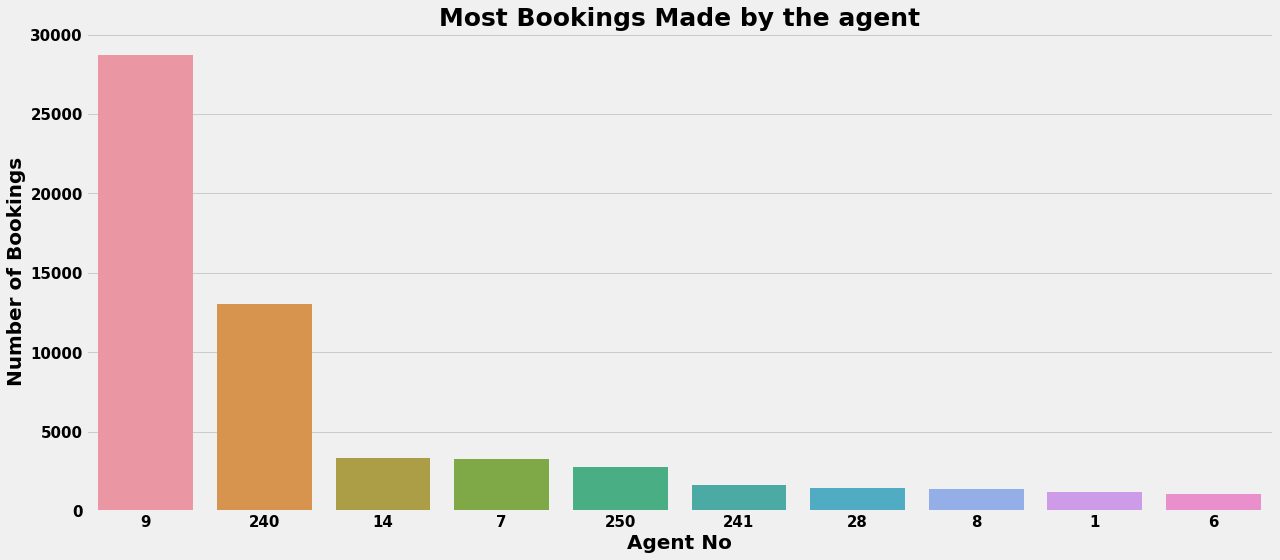

In [ ]:
plt.figure(figsize = (18,8))
sns.barplot(x = highest_booking['agent'].iloc[:10],y = highest_booking['Most_bookings'].iloc[:10],order = highest_booking.head(10)['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")
plt.show()

### **Observation**
### Agent ID no: 9 made most of the bookings

#3)What is the pecentage of cancellation?

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay'],
      dtype='object')

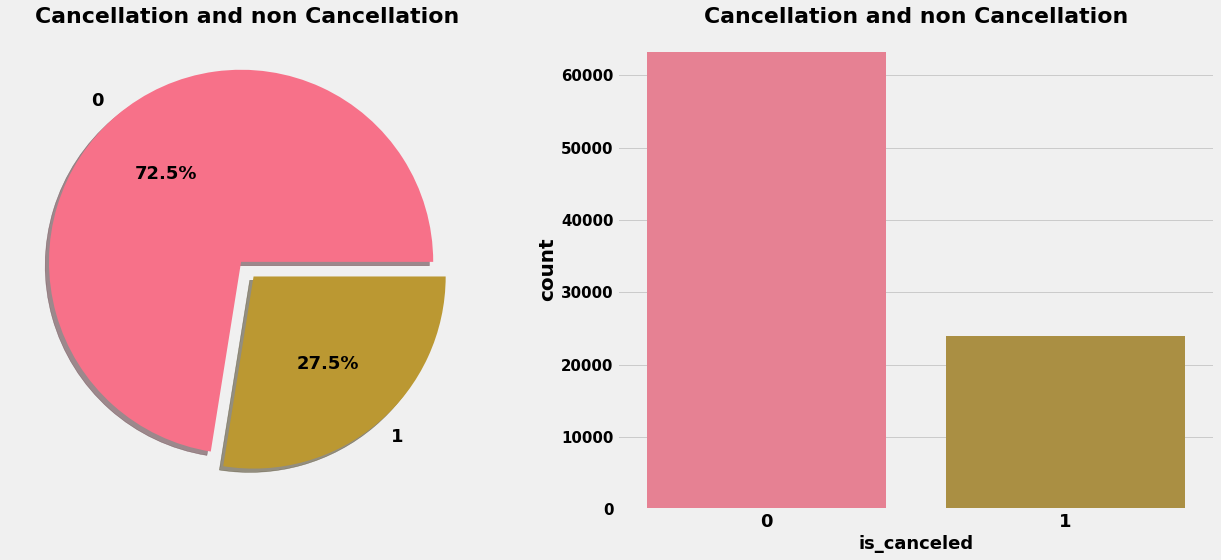

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['is_canceled'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title("Cancellation and non Cancellation", fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('is_canceled',data=df,ax=ax[1])
ax[1].set_title("Cancellation and non Cancellation",fontsize=22,fontweight ='bold')
ax[1].set_xlabel("is_canceled",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

### **Observation :**
### 0= not cancled
### 1= canceled

### 27.5 % of the bookings were cancelled.

# 4) What is the Percentage of repeated guests?

In [ ]:
df['is_repeated_guest'].unique()

array([0, 1])

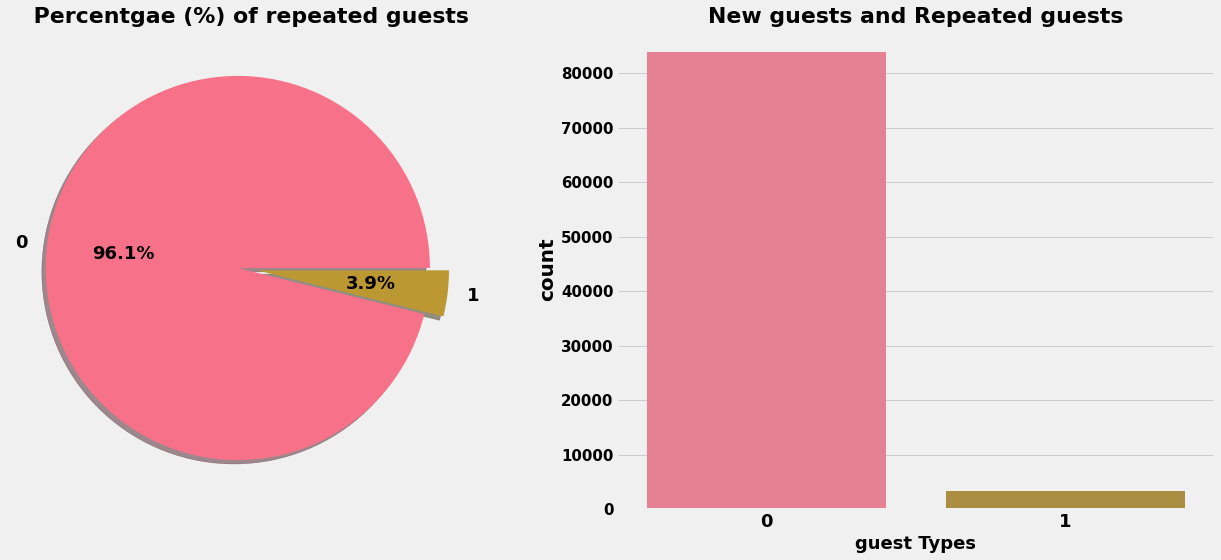

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['is_repeated_guest'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title(" Percentgae (%) of repeated guests", fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('is_repeated_guest',data=df,ax=ax[1])
ax[1].set_title("New guests and Repeated guests",fontsize=22,fontweight ='bold')
ax[1].set_xlabel("guest Types",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

### **Observation:**
### 0 - New Guests,1 - Repeated Guests
### Repeated guests are very few which only 3.9 %.
###In order to retained the guests management should take feedbacks from guests and try to imporve the services.

#5) What is the percentage distribution of "Customer Type"?

In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

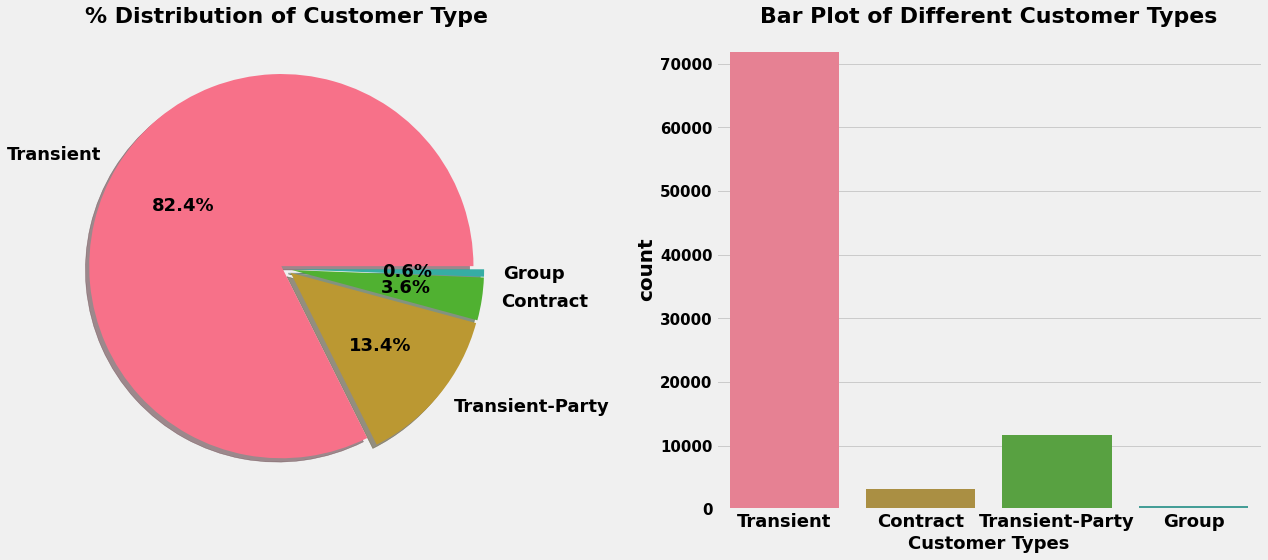

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['customer_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('% Distribution of Customer Type', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('customer_type',data=df,ax=ax[1])
ax[1].set_title("Bar Plot of Different Customer Types",fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Customer Types",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()


**1. Contract** 
>when the booking has an allotment or other type of contract associated to it

**2. Group**
> when the booking is associated to a group

**3. Transient**
>when the booking is not part of a group or contract, and is not associated to other transient booking

**4. Transient-party**
>when the booking is transient, but is associated to at least other transient booking

### **Observation:**
### Transient customer type is more whcih is 82.4 %. percentage of  Booking associated by the Group is vey low.

#6)What is the percentage distribution of required_car_parking_spaces?

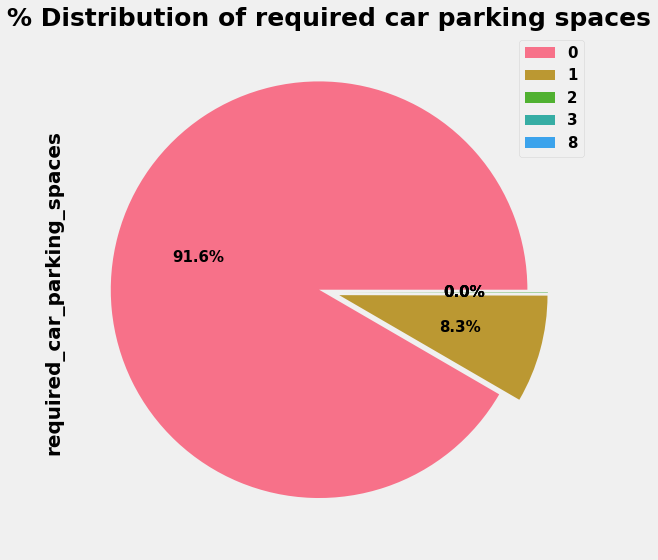

In [ ]:
df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

### **Observation**
### 91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

# 7)What is the percentage of booking changes made by the customer.?

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay'],
      dtype='object')

In [ ]:
df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 14, 15,
       18, 11])

In [ ]:
booking_change_df=df['booking_changes'].value_counts().reset_index().rename(columns = {'index':'number_booking_change','booking_changes':'counts'})
booking_change_df['counts_percent'] = booking_change_df['counts']*100/len(df)
booking_change_df

,number_booking_change,counts,counts_percent
0,0,71425,81.881234
1,1,10868,12.459016
2,2,3483,3.992892
3,3,862,0.988192
4,4,347,0.397799
5,5,113,0.129543
6,6,57,0.065344
7,7,29,0.033245
8,8,14,0.016050
9,9,8,0.009171


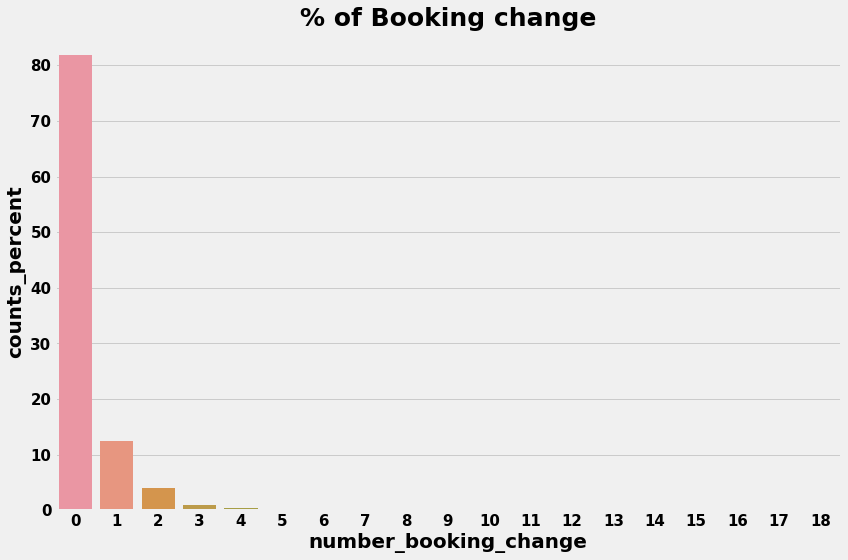

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x = booking_change_df['number_booking_change'], y = booking_change_df['counts_percent'])
plt.title("% of Booking change")
plt.show()

### 0= 0 changes made in the booking
### 1= 1 changes made in the booking
### 2= 2 changes made in the booking

### **Observation**
### Almost 82% of the bookings were not changed by guests.


# 8)What is Percentage distribution of Deposite type ?

In [ ]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

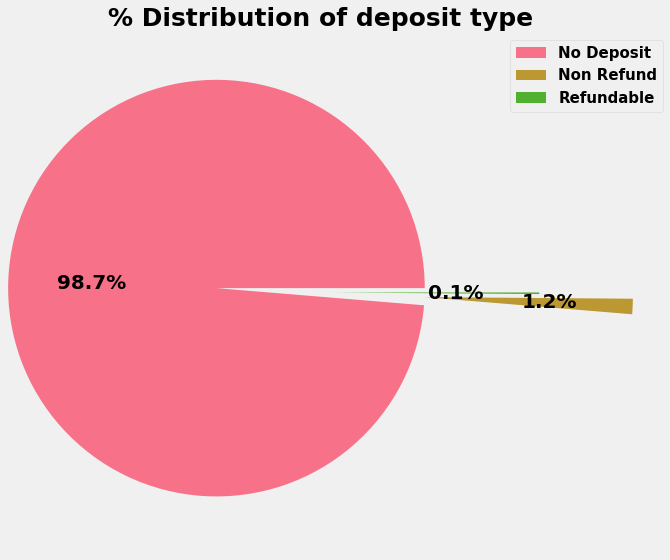

In [ ]:
df['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=df['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

### **Observation**
### 98.7 % of the guests prefer "No deposit" type of deposit.

# 9) Which type of food is mostly preferred by the guests?

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

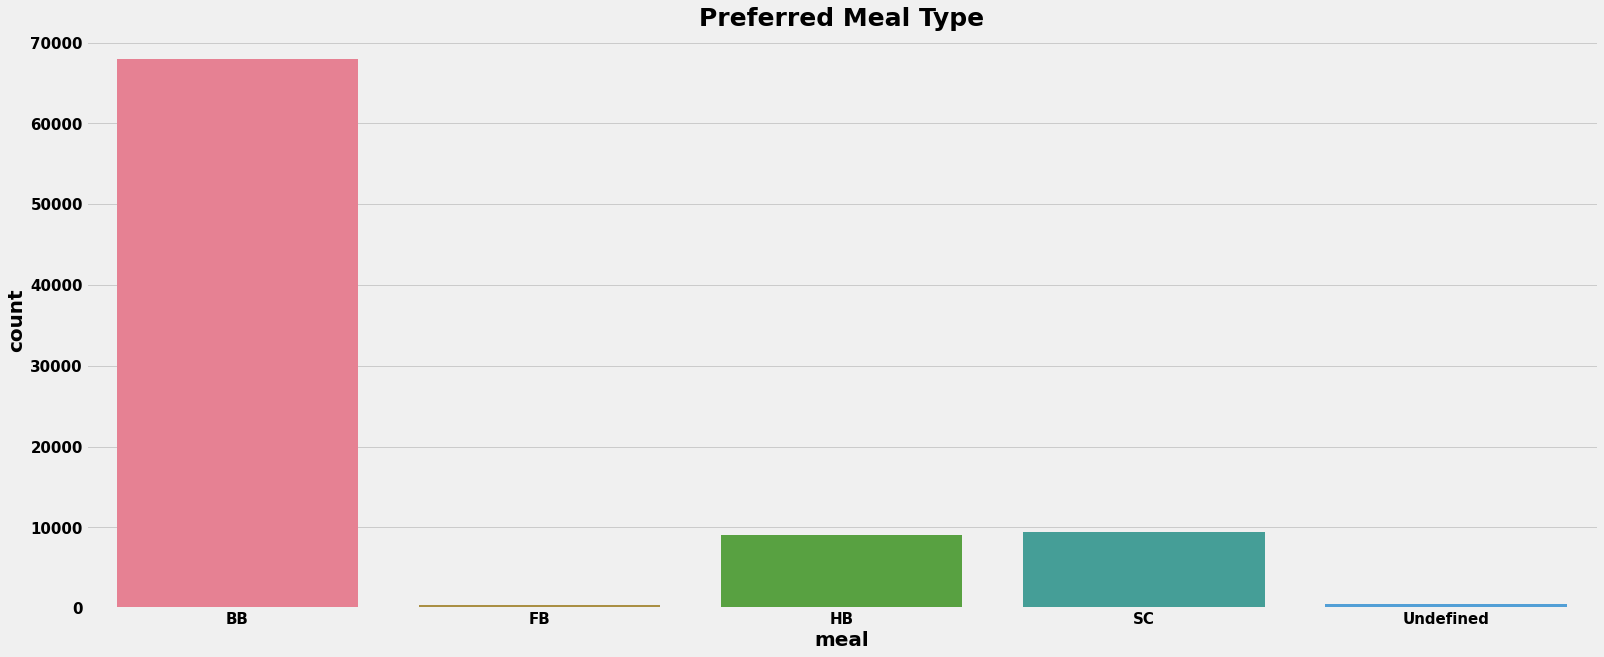

In [ ]:
sns.catplot(data = df,x = 'meal', kind = 'count',height = 9,aspect = 2.5)
plt.title("Preferred Meal Type")
plt.show()

Types of meal in hotels:
* BB - (Bed and Breakfast)
* HB- (Half Board)
* FB- (Full Board)
* SC- (Self Catering)
### **Observation**
### * So the most preferred meal type by the guests is BB( Bed and Breakfast) 
### * HB- (Half Board) and SC- (Self Catering) are equally preferred.


#10) From which country the most guests are coming?

In [ ]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'others', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA

In [ ]:
top_10_guest_country = df['country'].value_counts().reset_index().rename(columns = {'index':'country','country':'counts'}).sort_values(by = 'counts',ascending = False).head(10)
top_10_guest_country

,country,counts
0,PRT,27355
1,GBR,10424
2,FRA,8823
3,ESP,7244
4,DEU,5385
5,ITA,3061
6,IRL,3015
7,BEL,2081
8,BRA,1993
9,NLD,1910


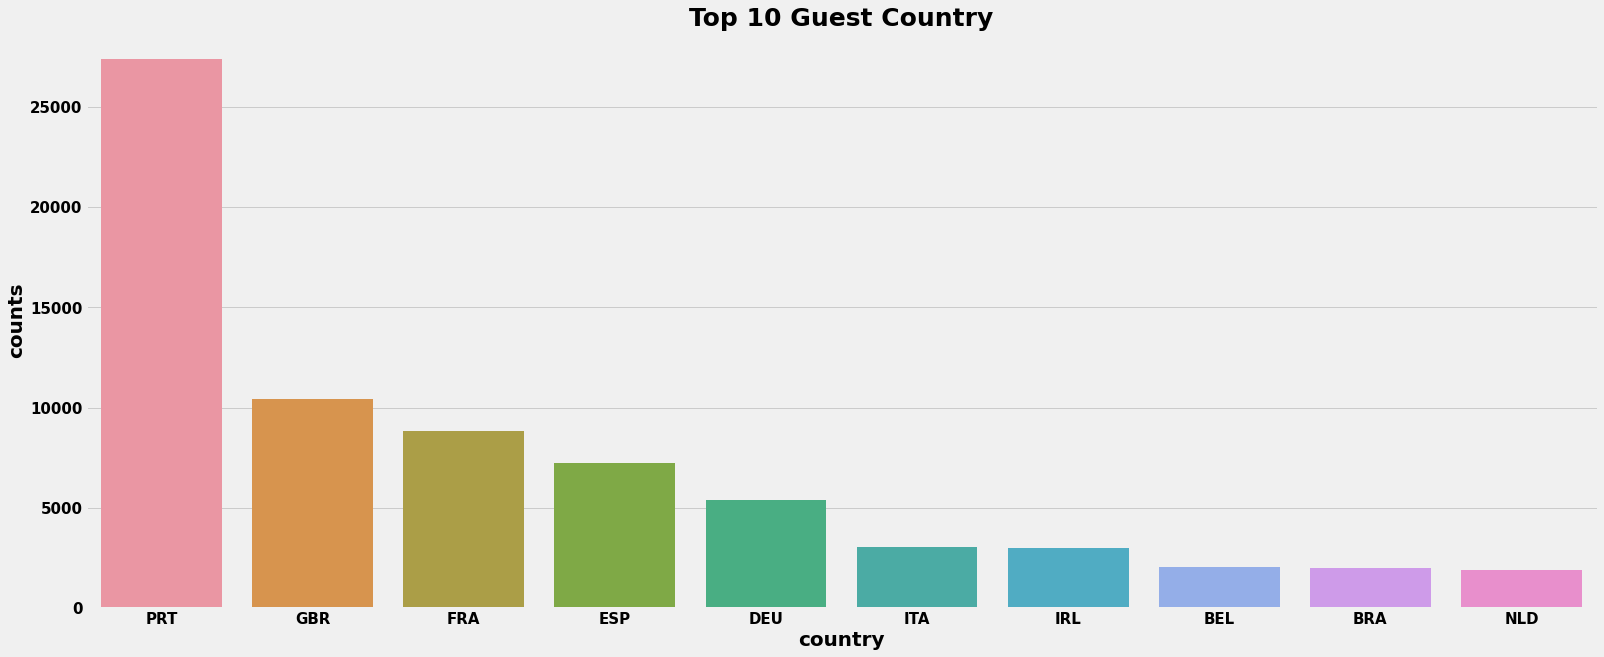

In [ ]:
sns.catplot(data = top_10_guest_country,x = 'country',y = 'counts',kind = 'bar',height = 9 ,aspect = 2.5)
plt.title('Top 10 Guest Country')
plt.show()

### **Observation**
### Most of the guests are coming from portugal i.e more 25000 guests are from portugal
abbreevations for countries-



1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany
6.   ITA -Itlay
7.   IRL - Ireland
8.   BEL -Belgium
9.   BRA -Brazil
10.  NLD-Netherlands





#11) Which is the most preferred room type by the customers?

In [ ]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

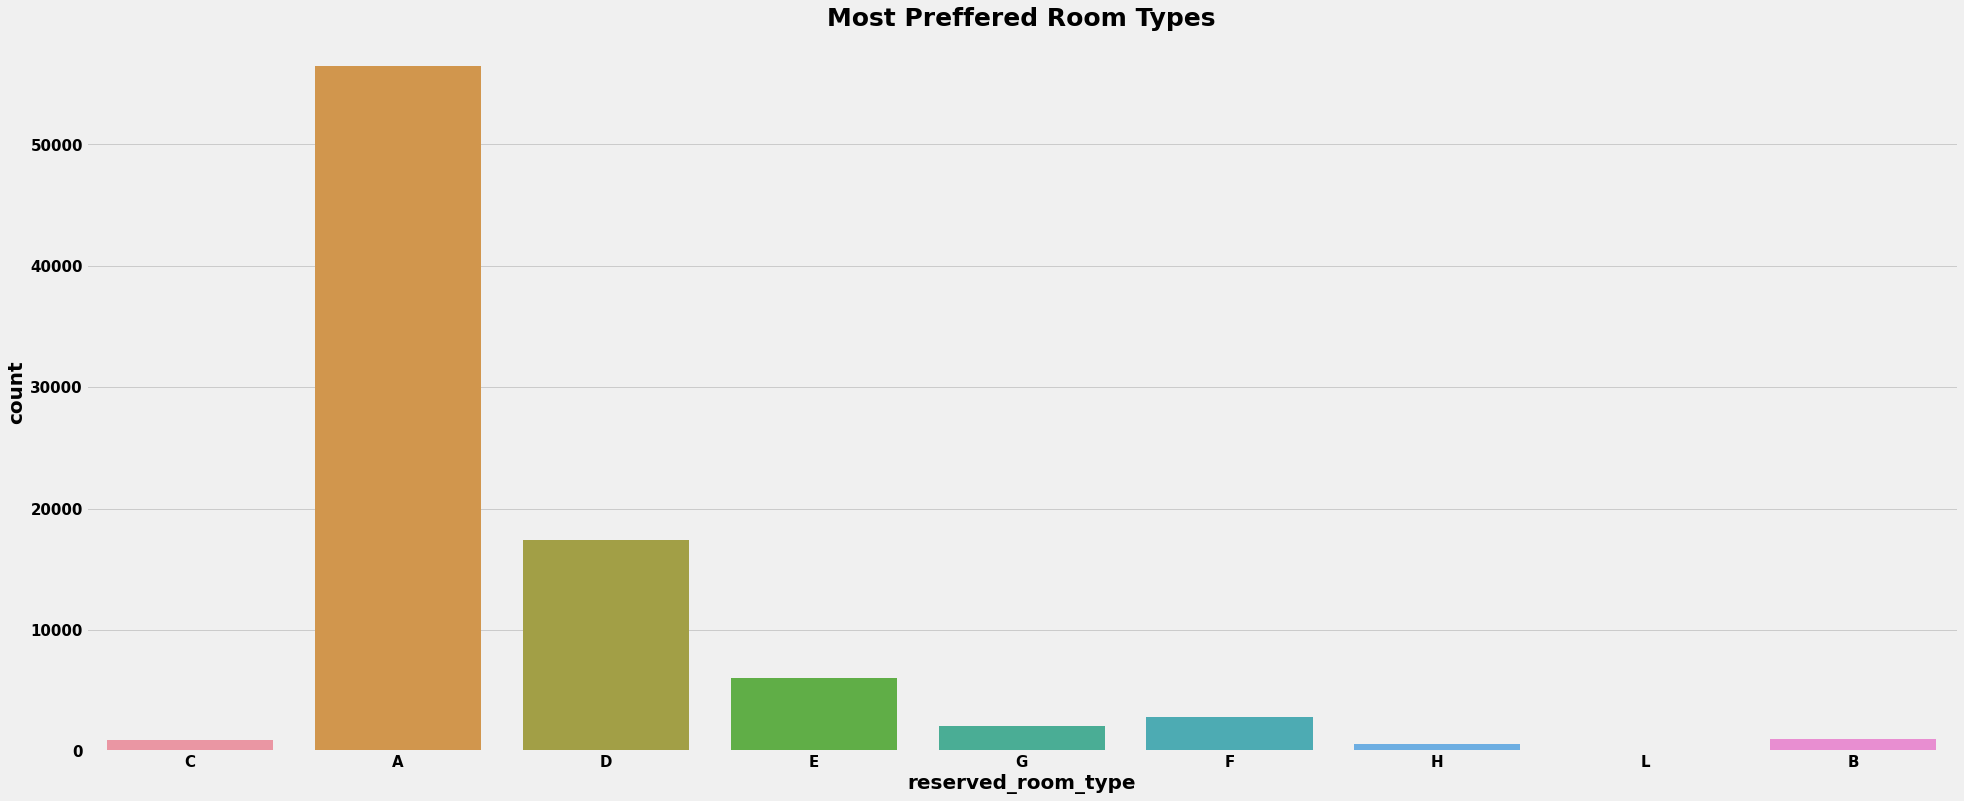

In [ ]:
sns.catplot(data = df,x = 'reserved_room_type',kind = 'count',height = 11,aspect = 2.5)
plt.title('Most Preffered Room Types')
plt.show()

### **Observation**
###So the most preferred Room type is "A".

# 12)In which month most of the bookings happened?

In [ ]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
preferred_months=df.groupby('arrival_date_month')['arrival_date_month'].agg({'count'}).reset_index()
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
preferred_months['arrival_date_month'] = pd.Categorical(preferred_months['arrival_date_month'],categories=months,ordered=True)
preferred_months = preferred_months.sort_values(by = 'arrival_date_month')
preferred_months

,arrival_date_month,count
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


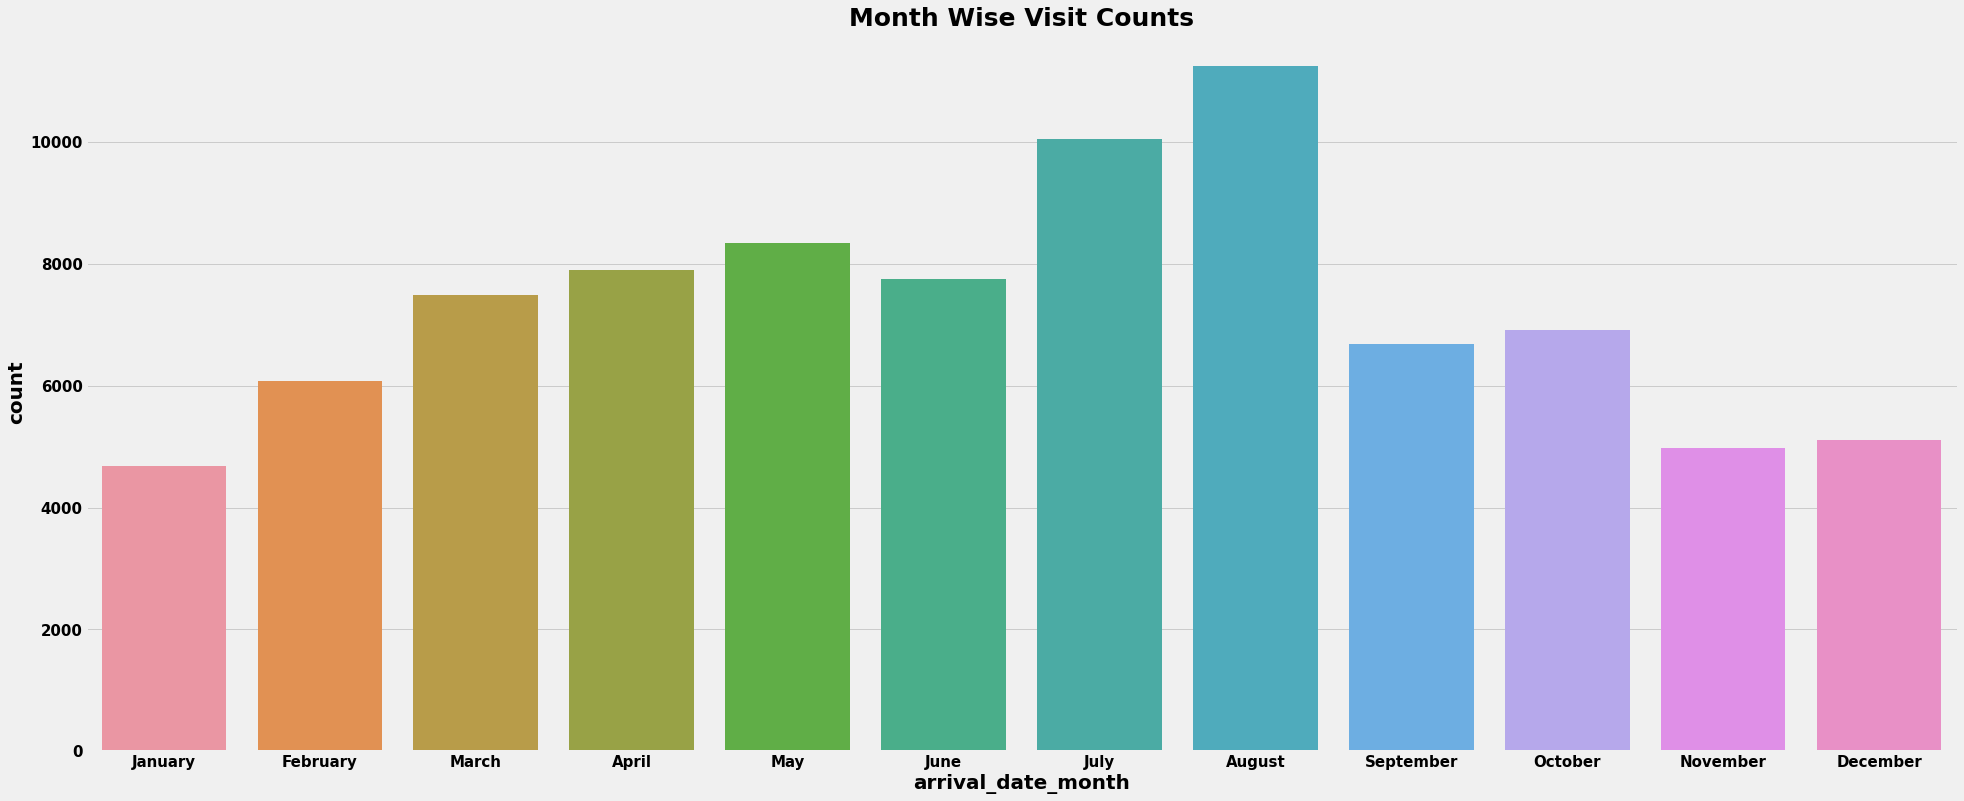

In [ ]:
sns.catplot(data = preferred_months,x = 'arrival_date_month',y = 'count',kind = 'bar',height = 11,aspect = 2.5)
plt.title('Month Wise Visit Counts')
plt.show()

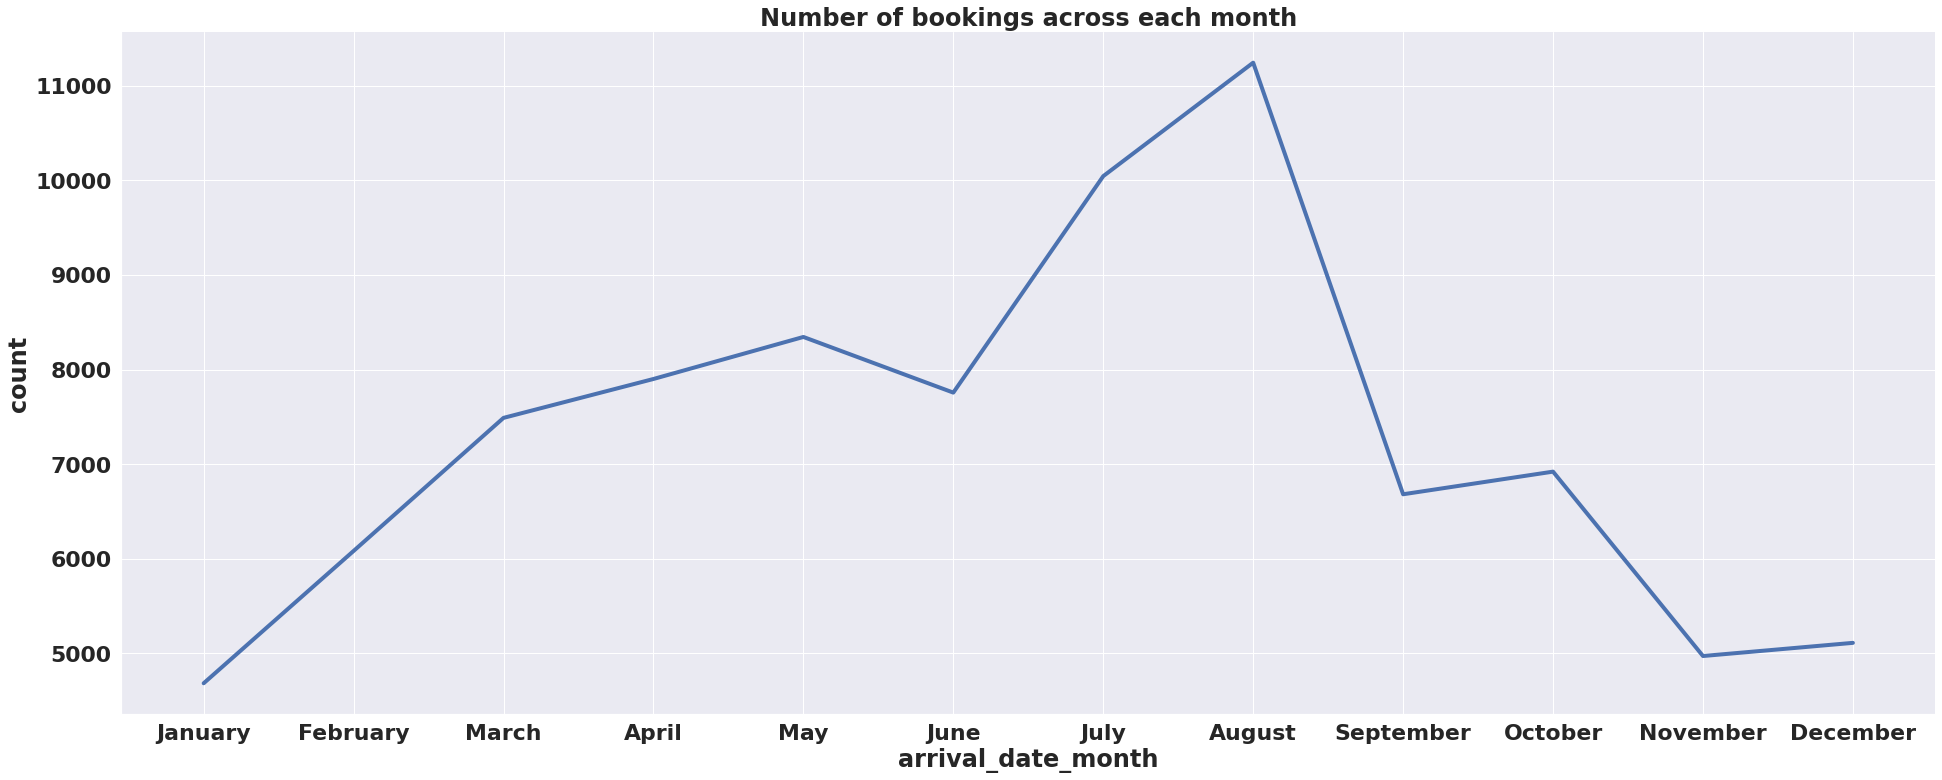

In [ ]:
sns.set(font_scale=2)
sns.relplot(data = preferred_months,x = 'arrival_date_month',y = 'count',kind = 'line',height = 11,aspect = 2.5,lw = 4)  # lw = line_width
plt.title('Number of bookings across each month')
plt.show()

 ### **Observation**
 July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

#13) Which Distribution channel is mostly used for hotel bookings?

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
prefer_dist_channel = df['distribution_channel'].value_counts().reset_index().rename(columns = {'index':'distribution_channel','distribution_channel':'counts'})
#adding percentage columns to the distribution_channel_df.
prefer_dist_channel['count_percent'] = round(prefer_dist_channel['counts']*100/len(df),2)
prefer_dist_channel

,distribution_channel,counts,count_percent
0,TA/TO,69028,79.13
1,Direct,12954,14.85
2,Corporate,5062,5.80
3,GDS,181,0.21
4,Undefined,5,0.01


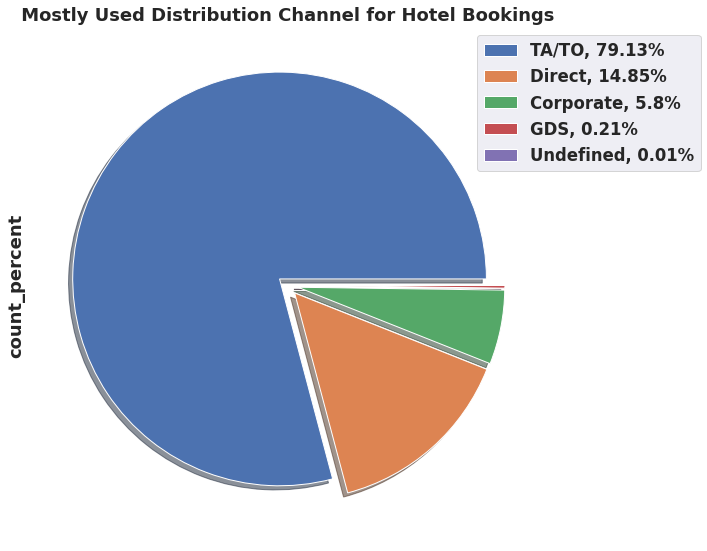

In [ ]:
sns.set(font_scale = 1.5)
#Creating labels
labels=prefer_dist_channel['distribution_channel'].values.tolist()

#Creating list of percentage
sizes = prefer_dist_channel['count_percent'].values.tolist()

#plotting the pie chart
prefer_dist_channel['count_percent'].plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=True, figsize=(15,8),fontsize=10,labels=None)

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]

plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')
plt.show()

###**Observation**:
###'TA/TO' is mostly(79.1%) used for booking hoetls.

# 14) Which year had the highest bookings?

In [ ]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

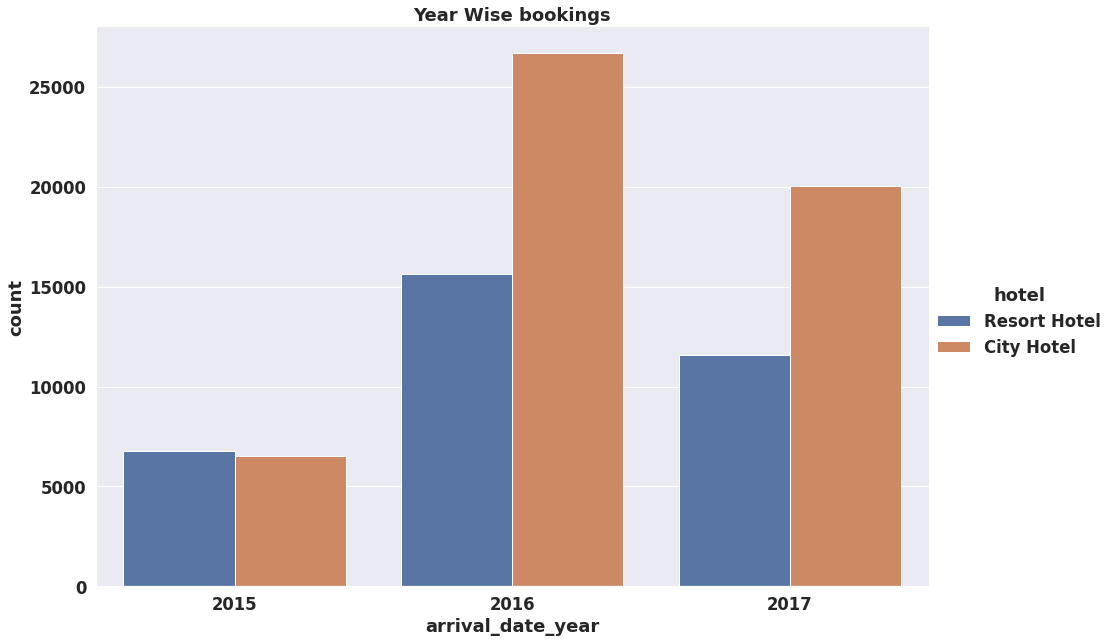

In [ ]:
sns.catplot(data = df,x = 'arrival_date_year',kind = 'count',height = 9,aspect = 1.5,hue = 'hotel')
plt.title("Year Wise bookings")
plt.show()

### **Observation**
###2016 had the higest bookings.
###2015 had less than 7000 bookings.
###overall City hotels had the most of the bookings.

# Bivariate and Multivariate Analysis

#1) Which Hotel type has  the highest ADR?

In [ ]:
df['adr'].nunique()

8866

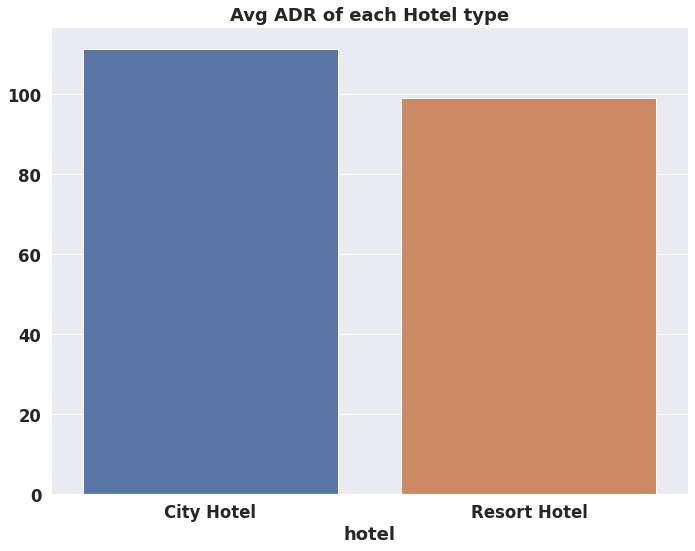

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = df.groupby('hotel')['adr'].mean().index,y = df.groupby('hotel')['adr'].mean().values)
plt.title("Avg ADR of each Hotel type")
plt.show()

### **Observation**
### City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

# 2) Which hotel type has the more lead time?

In [ ]:
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

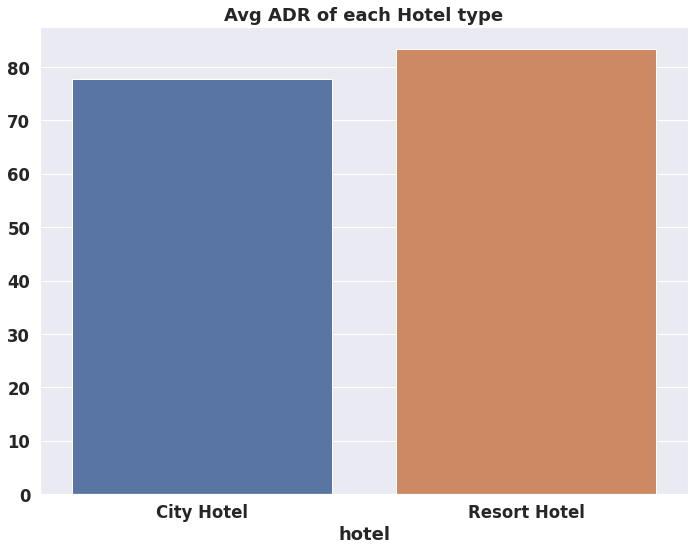

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = df.groupby('hotel')['lead_time'].mean().index,y = df.groupby('hotel')['lead_time'].mean().values)
plt.title("Avg ADR of each Hotel type")
plt.show()

###**Observation**
###Resort hotels has slightly  high avg lead time. That means customers plan their trips very early. 

#3) Which hotel has highest percentage of booking cancellation?

In [ ]:
df['is_canceled'].unique()

array([0, 1])

In [ ]:
# Filtering Dataframe on the basis of Cancellation.
canceled_df = df[df['is_canceled'] == 1]
canceled_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,82.0,0,1,Canceled,2015-05-06,2.0,3
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,0,Transient,105.5,0,0,Canceled,2015-04-22,2.0,3
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,0,Transient,123.0,0,0,Canceled,2015-06-23,2.0,4
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,0,Transient,107.0,0,2,Canceled,2015-05-11,2.0,7
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0,0,Transient,108.3,0,2,Canceled,2015-05-29,2.0,10


In [ ]:
# Checking How many times the hotels were cancelled.
canceled_count = canceled_df.groupby('hotel')['is_canceled'].sum().reset_index().rename(columns = {'is_canceled':'cancellation_count'})
canceled_count

,hotel,cancellation_count
0,City Hotel,16035
1,Resort Hotel,7974


In [ ]:
# Checking How many the respective hotel is booked.
total_booking = df.groupby('hotel')['hotel'].agg({'count'}).reset_index().rename(columns = {'count':'total_booking_counts'})
total_booking

,hotel,total_booking_counts
0,City Hotel,53274
1,Resort Hotel,33956


In [ ]:
# Now concatenating the above two dataframes.
concatenated_df = pd.merge(canceled_count,total_booking)
concatenated_df

,hotel,cancellation_count,total_booking_counts
0,City Hotel,16035,53274
1,Resort Hotel,7974,33956


In [ ]:
# Now adding percent_canceled feature in concatenated_df
concatenated_df['percent_canceled'] = (concatenated_df['cancellation_count']*100)/concatenated_df['total_booking_counts']
concatenated_df

,hotel,cancellation_count,total_booking_counts,percent_canceled
0,City Hotel,16035,53274,30.099110
1,Resort Hotel,7974,33956,23.483331


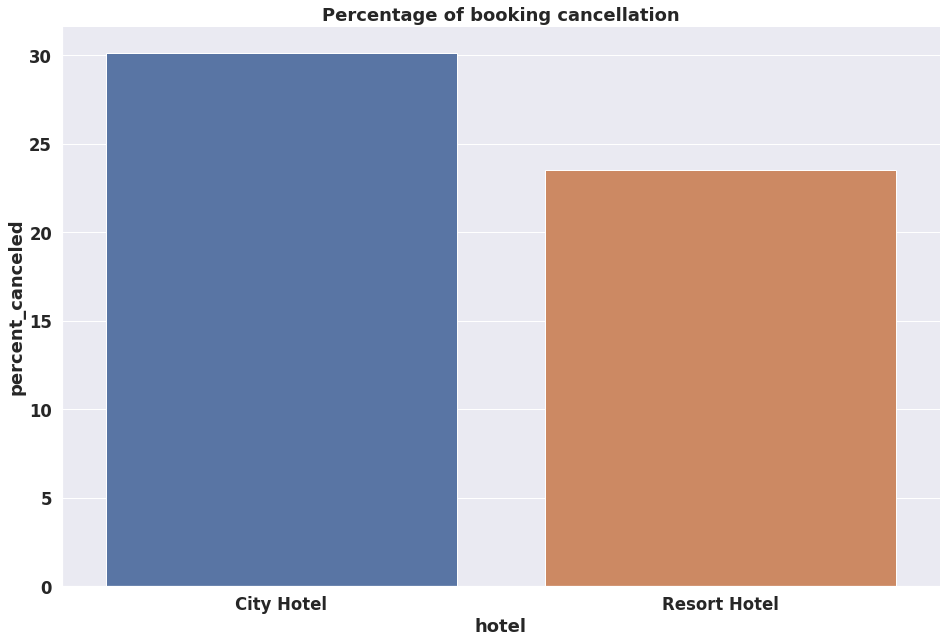

In [ ]:
# Visualising with Bar Plot.
sns.catplot(data = concatenated_df, x = 'hotel', y = 'percent_canceled', kind = 'bar' ,height = 9 , aspect = 1.5)
plt.title("Percentage of booking cancellation")
plt.show()

###**Observation**
###Resort Hotel has more affinity towards Cancellation. 

#4)Which hotel has longer waiting time?

In [ ]:
df['days_in_waiting_list'].value_counts().to_frame()

,days_in_waiting_list
0,86375
63,53
87,25
44,23
15,22
...,...
109,1
116,1
142,1
52,1


In [ ]:
# Applying groupby on hotel and evaluating mean of feature 'days_in_waiting_list'.
waiting_df = df.groupby('hotel').agg({'days_in_waiting_list':'mean'}).reset_index().rename(columns = {'days_in_waiting_list':"avg_wating_days"})
waiting_df

,hotel,avg_wating_days
0,City Hotel,1.020066
1,Resort Hotel,0.316763


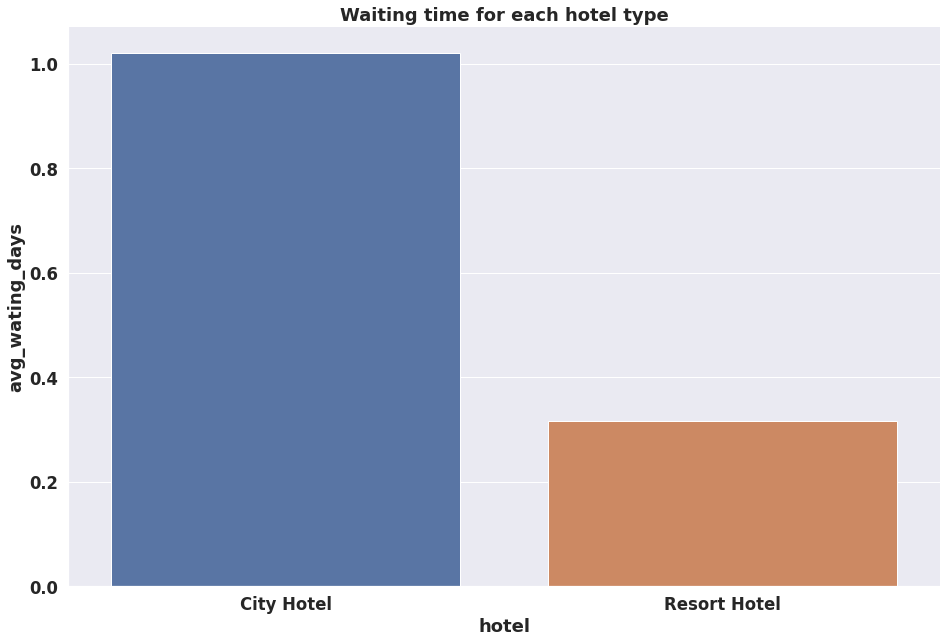

In [ ]:
# Visualisation
sns.catplot(data = waiting_df,x = 'hotel', y = 'avg_wating_days',kind = 'bar',height = 9,aspect = 1.5)
plt.title("Waiting time for each hotel type")
plt.show()

###**Observation**
### So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

# 5) Which Hotels has the most repeated guests?

In [ ]:
df['is_repeated_guest'].unique()

array([0, 1])

In [ ]:
# Applying groupby on hotel and taking sum on 'is_repeated_guest'
repeated_guest = df.groupby('hotel')['is_repeated_guest'].sum().reset_index().rename(columns = {'is_repeated_guest':'total_repeated_guest_count'})
repeated_guest

,hotel,total_repeated_guest_count
0,City Hotel,1657
1,Resort Hotel,1707


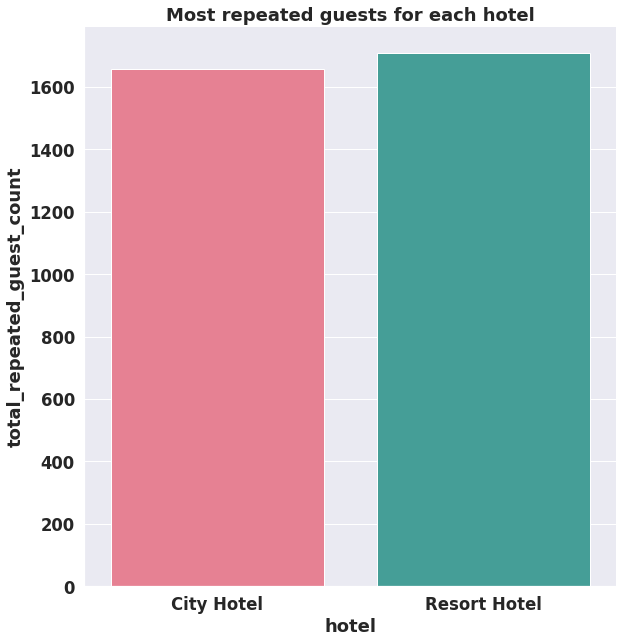

In [ ]:
# Visulisation 
sns.catplot(data = repeated_guest, x = 'hotel',y = 'total_repeated_guest_count',kind = 'bar',height = 9,aspect = 1,palette = "husl")
plt.title("Most repeated guests for each hotel")
plt.show()

#**Observation**
###Resort Hotel has slightly more repeated guests than the City Hotels. It is almost similar for both hotels.

#ADR across the different month.

In [ ]:
df['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [ ]:
df['adr'].value_counts().to_frame()

,adr
0.00,1643
75.00,1320
65.00,1260
48.00,878
85.00,858
...,...
302.50,1
130.06,1
88.95,1
205.43,1


In [ ]:
# Applying groupby on arrival_date_month & hotel and evaluating Mean on adr. 
bookings_by_months_df = df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

#create month list
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating order of the month acording to month list.
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'],categories = month,ordered= True)

# Now framing the dataframe according to the order of months
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


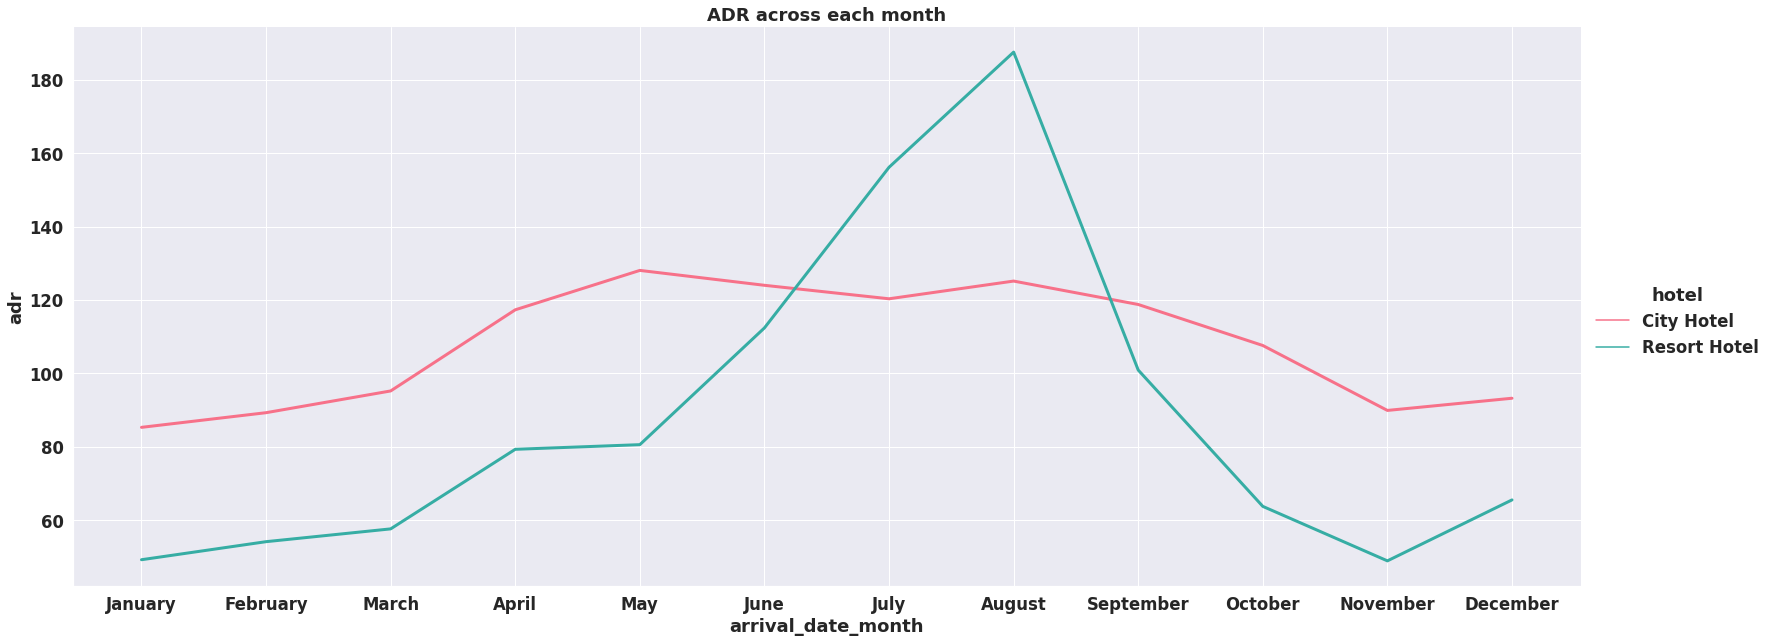

In [ ]:
# Visualisation
sns.relplot(data = bookings_by_months_df,x = 'arrival_date_month' , y = 'adr',hue = 'hotel',kind = 'line',height = 9,aspect = 2.5,lw = 3,palette = "husl")
plt.title('ADR across each month')
plt.show()

### **Observation**

For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

#7)Which distribution channel contributed more to adr in order to increase the income.?

In [ ]:
df['distribution_channel'].value_counts().to_frame()

,distribution_channel
TA/TO,69028
Direct,12954
Corporate,5062
GDS,181
Undefined,5


In [ ]:
# Applying groupby on arrival_date_month & hotel and evaluating Mean on adr.
dist_chan_df = df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index().rename(columns = {'adr':'mean_adr'})
dist_chan_df

,distribution_channel,hotel,mean_adr
0,Corporate,City Hotel,83.777368
1,Corporate,Resort Hotel,53.036835
2,Direct,City Hotel,112.606688
3,Direct,Resort Hotel,106.566215
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.663552
6,TA/TO,Resort Hotel,101.578317
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


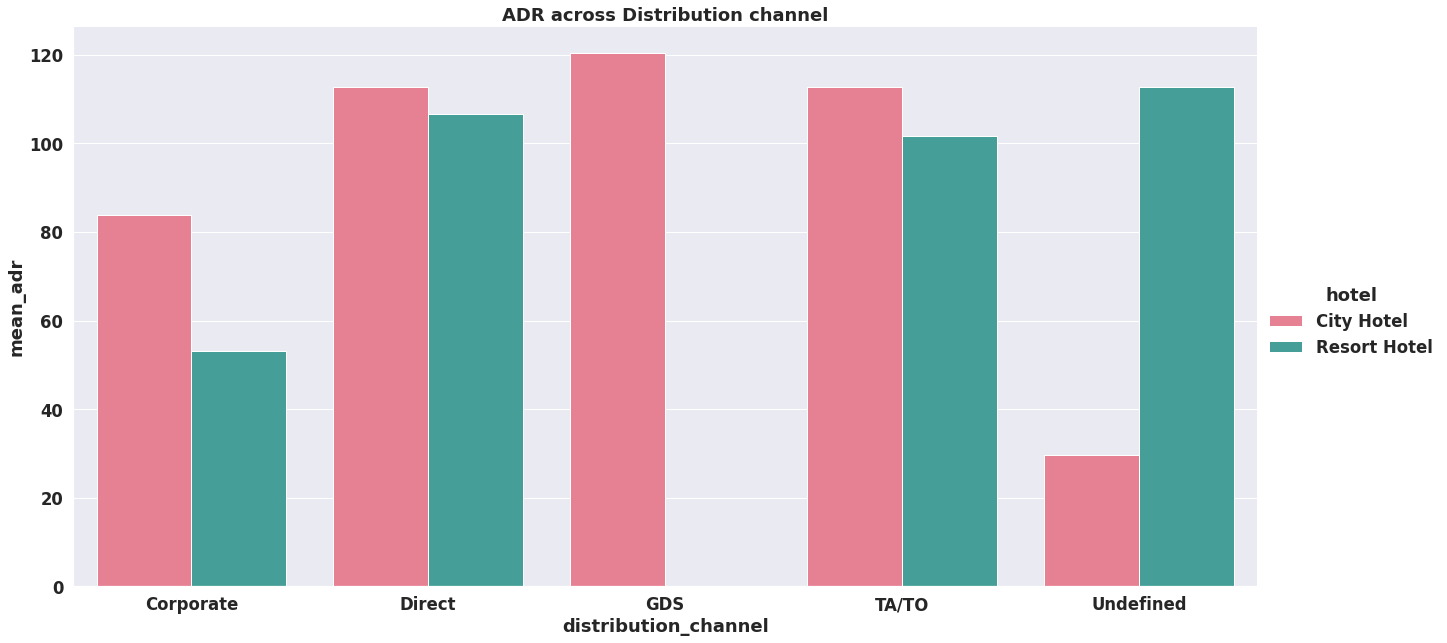

In [ ]:
# Visualisation
sns.catplot(data = dist_chan_df, x = 'distribution_channel', y = 'mean_adr',kind = 'bar',hue = 'hotel',palette = "husl",height = 9,aspect = 2)
plt.title('ADR across Distribution channel')
plt.show()

* Corporate- These are corporate hotel booing companies which makes bookings 
possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through  travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

### **Observation**
### From the plot is clear that 
### 'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.
###  GDS has highly contributed in adr in 'City Hotel' type.
### GDS needs to be increased for Resort Hotel bookings.

#8) Which distribution channel has the higest cancellation rate?


In [ ]:
df['is_canceled'].value_counts().to_frame()

,is_canceled
0,63221
1,24009


In [ ]:
# Applying groupby on distribution_channel & hotel and taking sum on 'is_canceled'
canceled_df = df.groupby(['distribution_channel','hotel'])['is_canceled'].sum().reset_index().rename(columns = {'is_canceled':"total_canceled"})
canceled_df

,distribution_channel,hotel,total_canceled
0,Corporate,City Hotel,330
1,Corporate,Resort Hotel,316
2,Direct,City Hotel,971
3,Direct,Resort Hotel,952
4,GDS,City Hotel,36
5,TA/TO,City Hotel,14694
6,TA/TO,Resort Hotel,6706
7,Undefined,City Hotel,4
8,Undefined,Resort Hotel,0


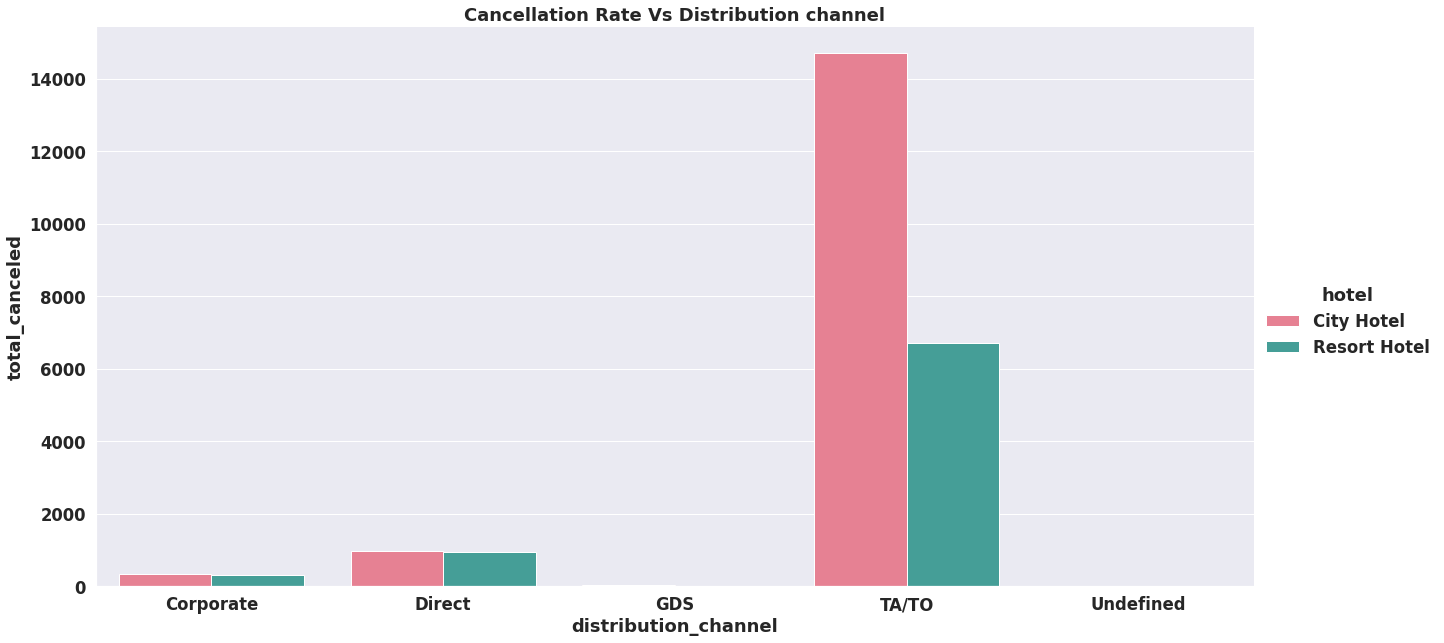

In [ ]:
# Visualisation
sns.catplot(data = canceled_df, x = 'distribution_channel', y = 'total_canceled',kind = 'bar',hue = 'hotel',palette = "husl",height = 9,aspect = 2)
plt.title('Cancellation Rate Vs Distribution channel')
plt.show()

### **Observation**

* In "TA/TO", City hotels has the high cancellation rate compared to resort 
hotels.
* In "direct" both the hotels has almost same cancellation rate.

#9)Which Market Segment  has the higest cancellation rate?

In [ ]:
df['market_segment'].value_counts().to_frame()

,market_segment
Online TA,51553
Offline TA/TO,13855
Direct,11780
Groups,4922
Corporate,4200
Complementary,692
Aviation,226
Undefined,2


In [ ]:
# Applying groupby on market_segment & hotel and taking sum on 'is_canceled'
market_segment_df = df.groupby(['market_segment','hotel'])['is_canceled'].sum().reset_index().rename(columns = {'is_canceled':"total_canceled"})
market_segment_df

,market_segment,hotel,total_canceled
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1257


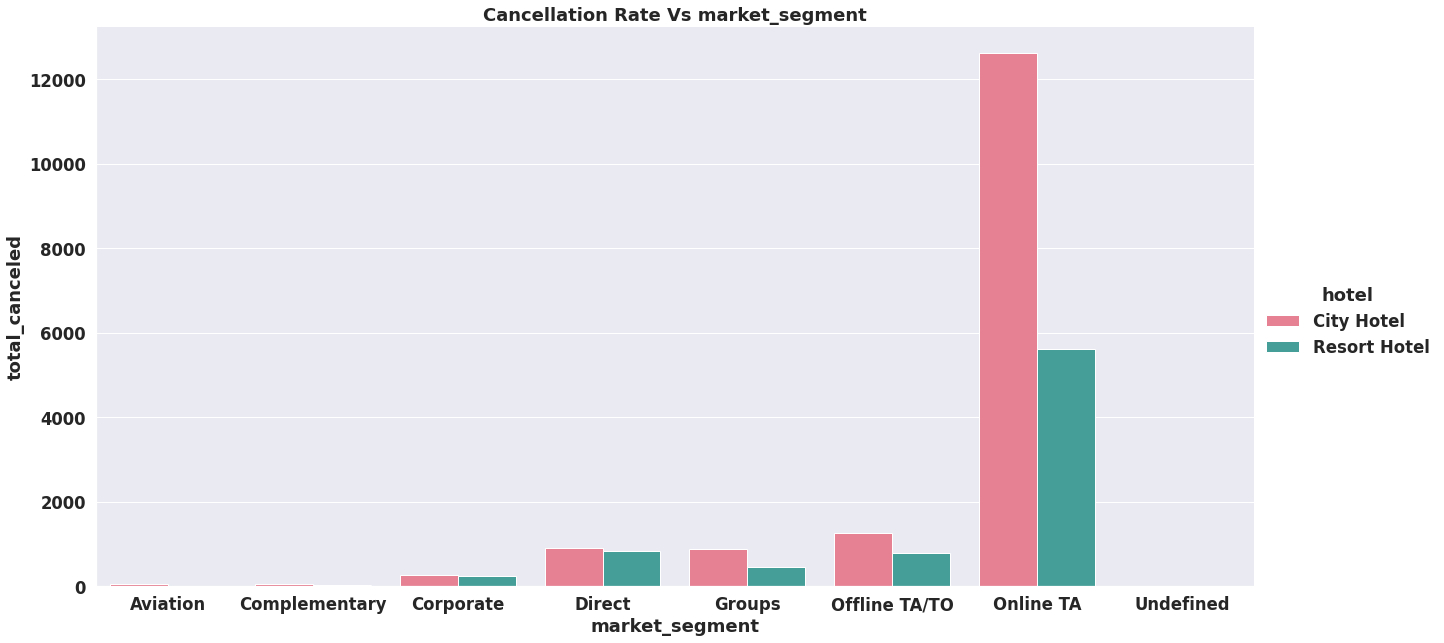

In [ ]:
# Visualisation
sns.catplot(data = market_segment_df, x = 'market_segment', y = 'total_canceled',kind = 'bar',hue = 'hotel',palette = "husl",height = 9,aspect = 2)
plt.title('Cancellation Rate Vs market_segment')
plt.show()

### **Observation** 
### 'Online T/A' has the highest cancellation in both type of cities
In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

#10) Does the guests alloted with the same room type which was reserved by them?

In [ ]:
# creating new dataframe with required features
df_new = df[['reserved_room_type','assigned_room_type']]
df_new.head(10)

,reserved_room_type,assigned_room_type
0,C,C
1,C,C
2,A,C
3,A,A
4,A,A
6,C,C
7,C,C
8,A,A
9,D,D
10,E,E


In [ ]:
# making a function to add new features as flag
def room_similarity(data):
  if data['reserved_room_type'] == data['assigned_room_type']:
    return 1
  else:
    return 0


In [ ]:
# apply the function
df_new['flag'] = df_new.apply(lambda data :room_similarity(data),axis = 1)

In [ ]:
df_new.head(10)

,reserved_room_type,assigned_room_type,flag
0,C,C,1
1,C,C,1
2,A,C,0
3,A,A,1
4,A,A,1
6,C,C,1
7,C,C,1
8,A,A,1
9,D,D,1
10,E,E,1


In [ ]:
# Now Calculating how many people getting their choice of roooms
# count of 1 calculates how many people geting their choice of rooms
# count of 0 calculated how many people not geting their chice of rooms
room_choice_df = df_new.groupby('flag').agg({'flag':'count'}).rename(columns = {'flag':'counts'}).reset_index()
room_choice_df


,flag,counts
0,0,12990
1,1,74240


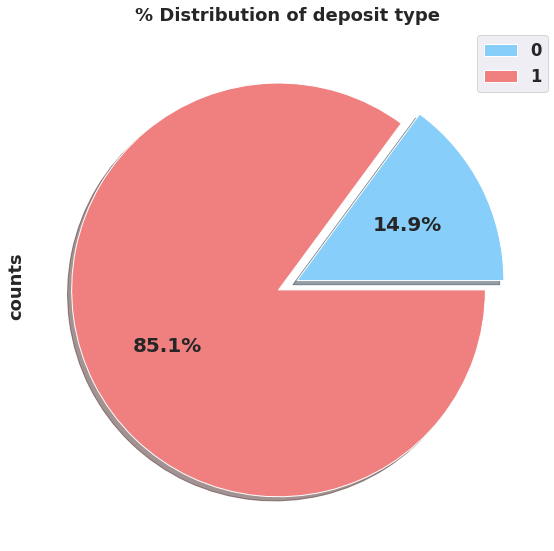

In [ ]:
# Visualisation
colors = ['lightskyblue','lightcoral']
room_choice_df['counts'].plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(14,8),fontsize=20,labels=None,colors = colors)
plt.title("% Distribution of deposit type")
labels=room_choice_df['flag'].values.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

#11) Not getting room type of choice vs cancellation ?

In [ ]:
# Checking first 5 rows of df_new
df_new.head(5)

,reserved_room_type,assigned_room_type,flag
0,C,C,1
1,C,C,1
2,A,C,0
3,A,A,1
4,A,A,1


In [ ]:
# Creating a temp dataframe from df only by considering 'hotel' & 'is_canceled' features
temp_df = df[['hotel','is_canceled']]
temp_df.head()

,hotel,is_canceled
0,Resort Hotel,0
1,Resort Hotel,0
2,Resort Hotel,0
3,Resort Hotel,0
4,Resort Hotel,0


In [ ]:
# Now concatenating the above two dataframes 
df_new = pd.concat([df_new,temp_df],axis = 1)

In [ ]:
df_new.head()

,reserved_room_type,assigned_room_type,flag,hotel,is_canceled
0,C,C,1,Resort Hotel,0
1,C,C,1,Resort Hotel,0
2,A,C,0,Resort Hotel,0
3,A,A,1,Resort Hotel,0
4,A,A,1,Resort Hotel,0


In [ ]:
df_new.shape

(87230, 5)

In [ ]:
# Applying groupby operation on flag and evaluating Sum on 'is_canceled' features.This will give total number of cancelled booking w.r.t room allocation.
# flag 0 ----Represents customers does't get room of their choices
# flag 1 ----Represents customers does get room of their choices

# Renaming the column
room_alloc_can_df = df_new.groupby(['flag','hotel'])['is_canceled'].sum().reset_index().rename(columns = {'is_canceled':'total_cancellation'})

# Checking number of rows in room_alloc_can_df where flag is zero(0)
flag_0_shape = df_new.loc[df_new['flag'] == 0].shape[0]
print(f'number of rows with flag 0 are {flag_0_shape}')

# Checking number of rows in room_alloc_can_df where flag is zero(1)
flag_1_shape = df_new.loc[df_new['flag'] == 1].shape[0]
print(f'number of rows with flag 1 are {flag_1_shape}')

print(' ')

# Adding a new feature 'cancel_percent' which represents (total_cancellation with flag 0)*100 / total number of booking with flag 0 
#                                                       &(total_cancellation with flag 1)*100 / total number of booking with flag 1
room_alloc_can_df['cancel_percent'] = np.where(room_alloc_can_df['flag'] == 0,(room_alloc_can_df['total_cancellation']*100)/flag_0_shape,room_alloc_can_df['total_cancellation']*100/flag_1_shape)
room_alloc_can_df

number of rows with flag 0 are 12990
number of rows with flag 1 are 74240
 


,flag,hotel,total_cancellation,cancel_percent
0,0,City Hotel,314,2.417244
1,0,Resort Hotel,302,2.324865
2,1,City Hotel,15721,21.175916
3,1,Resort Hotel,7672,10.334052


## flag 0 ----Represents customers does't get room of their choices
## flag 1 ----Represents customers does get room of their choices#

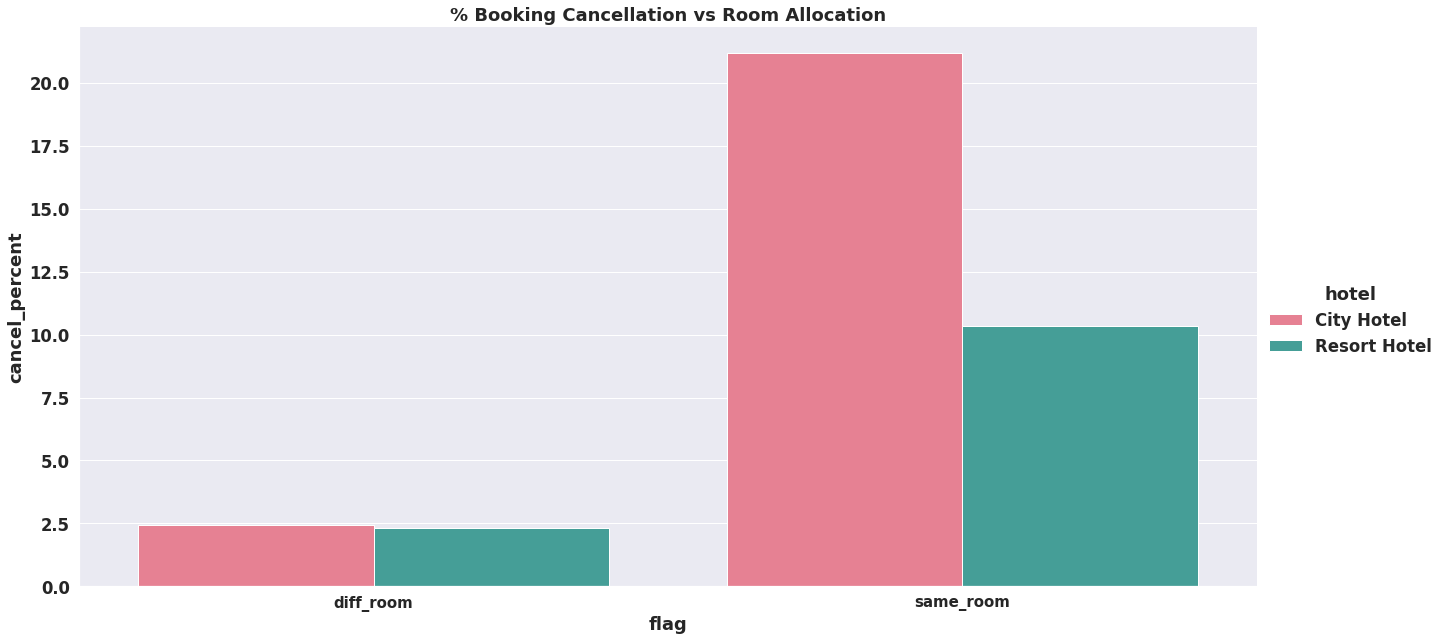

In [ ]:
# Visualisation
sns.catplot(data = room_alloc_can_df,x = 'flag' , y = 'cancel_percent',hue = 'hotel' , kind = 'bar',palette = "husl",height = 9,aspect = 2)
plt.title('% Booking Cancellation vs Room Allocation')
plt.xticks([0,1],['diff_room','same_room'],fontsize=15)
plt.show()

### **Obseravtion**


### Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.


#11) ADR across different  market segment


In [ ]:
# Applying groupby on hotel & market segment and evaluating mean on adr
mkt_seg_df = df.groupby(['market_segment','hotel'])['adr'].mean().reset_index().rename(columns = {'adr':'mean_adr'})
mkt_seg_df                                                                                

,market_segment,hotel,mean_adr
0,Aviation,City Hotel,100.613628
1,Complementary,City Hotel,2.802048
2,Complementary,Resort Hotel,3.868466
3,Corporate,City Hotel,83.020234
4,Corporate,Resort Hotel,51.920873
5,Direct,City Hotel,121.243682
6,Direct,Resort Hotel,112.827406
7,Groups,City Hotel,85.262047
8,Groups,Resort Hotel,63.688498
9,Offline TA/TO,City Hotel,87.632267


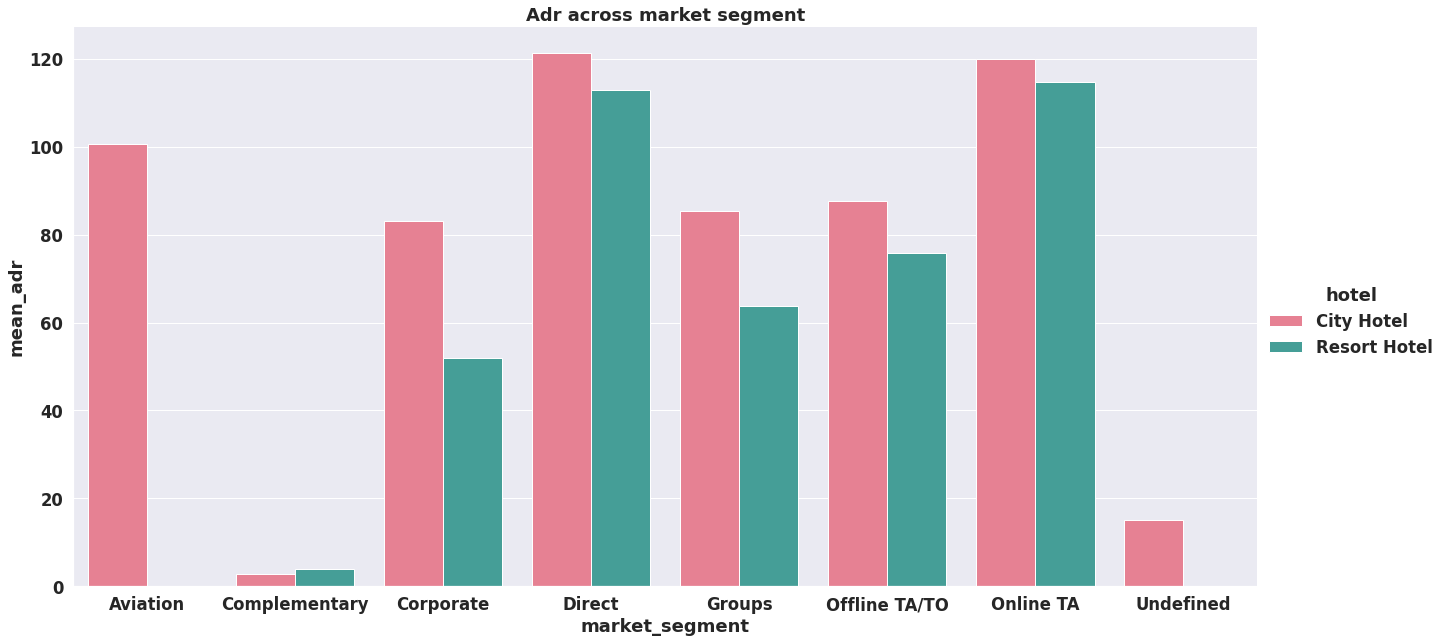

In [ ]:
# Visualisation
sns.catplot(data = mkt_seg_df,x = 'market_segment',y = 'mean_adr',hue = 'hotel',kind = 'bar',palette = "husl",height = 9,aspect = 2)
plt.title('Adr across market segment')
plt.show()

### **Obseravtion**
### 'Direct' and 'Online TA' are contributing the most in both types of hotels.
### Aviation segment should focus on increasing the bookings of 'City Hotel'

# 12)What is the Optimal stay length in both types of hotels ?

In [ ]:
df['total_stay'].value_counts().to_frame()

,total_stay
3,17827
1,17169
2,15734
4,13565
7,7520
5,6729
6,3263
10,1072
8,1062
14,859


In [ ]:
# Applying groupby on total_stay & hotel and taking counts
stay_df = df.groupby(['total_stay','hotel']).agg({'total_stay':'count'}).rename(columns = {'total_stay':'count_of_stay'}).reset_index()
stay_df

,total_stay,hotel,count_of_stay
0,0,City Hotel,231
1,0,Resort Hotel,360
2,1,City Hotel,10270
3,1,Resort Hotel,6899
4,2,City Hotel,10813
...,...,...,...
68,46,Resort Hotel,1
69,48,City Hotel,1
70,56,Resort Hotel,2
71,60,Resort Hotel,1


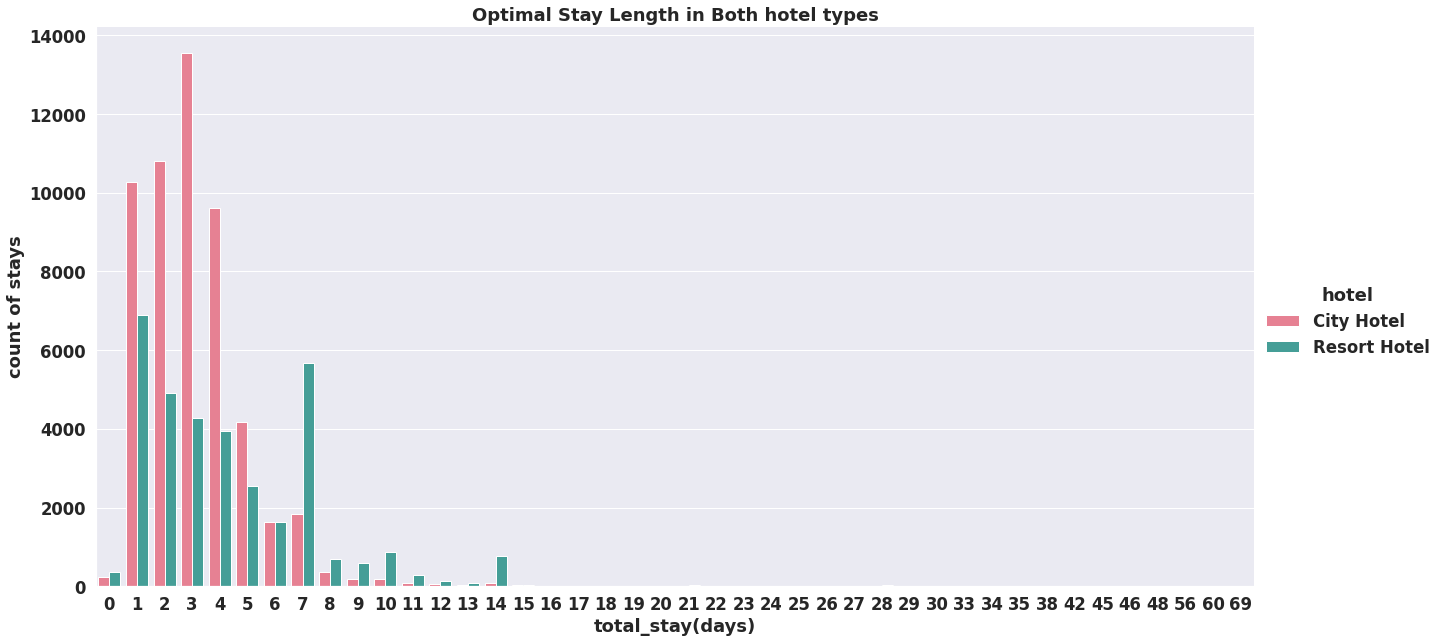

In [ ]:
# Visualisation
sns.catplot(data = stay_df,x = 'total_stay',y = 'count_of_stay',hue = 'hotel',kind = 'bar',palette = "husl",height = 9,aspect = 2)
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')
plt.show()

### **Observation:**
Optimal stay in both the type hotel is less than 7 days.

In [ ]:
# Applying groupby on total_stay,adr & hotel
grouped_df = df.groupby(['total_stay', 'adr','hotel']).count()
grouped_df

is_canceled  lead_time  arrival_date_year  \
total_stay adr    hotel                                                     
0          0.00   City Hotel            231        231                231   
                  Resort Hotel          360        360                360   
1          0.00   City Hotel            392        392                392   
                  Resort Hotel           91         91                 91   
           1.00   City Hotel              1          1                  1   
...                                     ...        ...                ...   
48         0.00   City Hotel              1          1                  1   
56         25.50  Resort Hotel            1          1                  1   
           28.79  Resort Hotel            1          1                  1   
60         110.50 Resort Hotel            1          1                  1   
69         110.00 Resort Hotel            1          1                  1   

                                arrival_date_month  arrival_date_week_number  \
total_stay adr    hotel                                                        
0          0.00   City Hotel                   231                       231   
                  Resort Hotel                 360                       360   
1          0.00   City Hotel                   392                       392   
                  Resort Hotel                  91                        91   
           1.00   City Hotel                     1                         1   
...                                            ...                       ...   
48         0.00   City Hotel                     1                         1   
56         25.50  Resort Hotel                   1                         1   
           28.79  Resort Hotel                   1                         1   
60         110.50 Resort Hotel                   1                         1   
69         110.00 Resort Hotel                   1                         1   

                                arrival_date_day_of_month  \
total_stay adr    hotel                                     
0          0.00   City Hotel                          231   
                  Resort Hotel                        360   
1          0.00   City Hotel                          392   
                  Resort Hotel                         91   
           1.00   City Hotel                            1   
...                                                   ...   
48         0.00   City Hotel                            1   
56         25.50  Resort Hotel                          1   
           28.79  Resort Hotel                          1   
60         110.50 Resort Hotel                          1   
69         110.00 Resort Hotel                          1   

                                stays_in_weekend_nights  stays_in_week_nights  \
total_stay adr    hotel                                                         
0          0.00   City Hotel                        231                   231   
                  Resort Hotel                      360                   360   
1          0.00   City Hotel                        392                   392   
                  Resort Hotel                       91                    91   
           1.00   City Hotel                          1                     1   
...                                                 ...                   ...   
48         0.00   City Hotel                          1                     1   
56         25.50  Resort Hotel                        1                     1   
           28.79  Resort Hotel                        1                     1   
60         110.50 Resort Hotel                        1                     1   
69         110.00 Resort Hotel                        1                     1   

                                adults  children  babies  meal  country  \
total_stay adr    hotel                                           

In [ ]:
# Fetching only grouped df without any aggregation operation
df_1 = pd.DataFrame(list(grouped_df.index),columns = ['total_stay', 'adr','hotel'])

In [ ]:
# Restricting total stay upto 7 days 
df_1 = df_1.iloc[:18000]

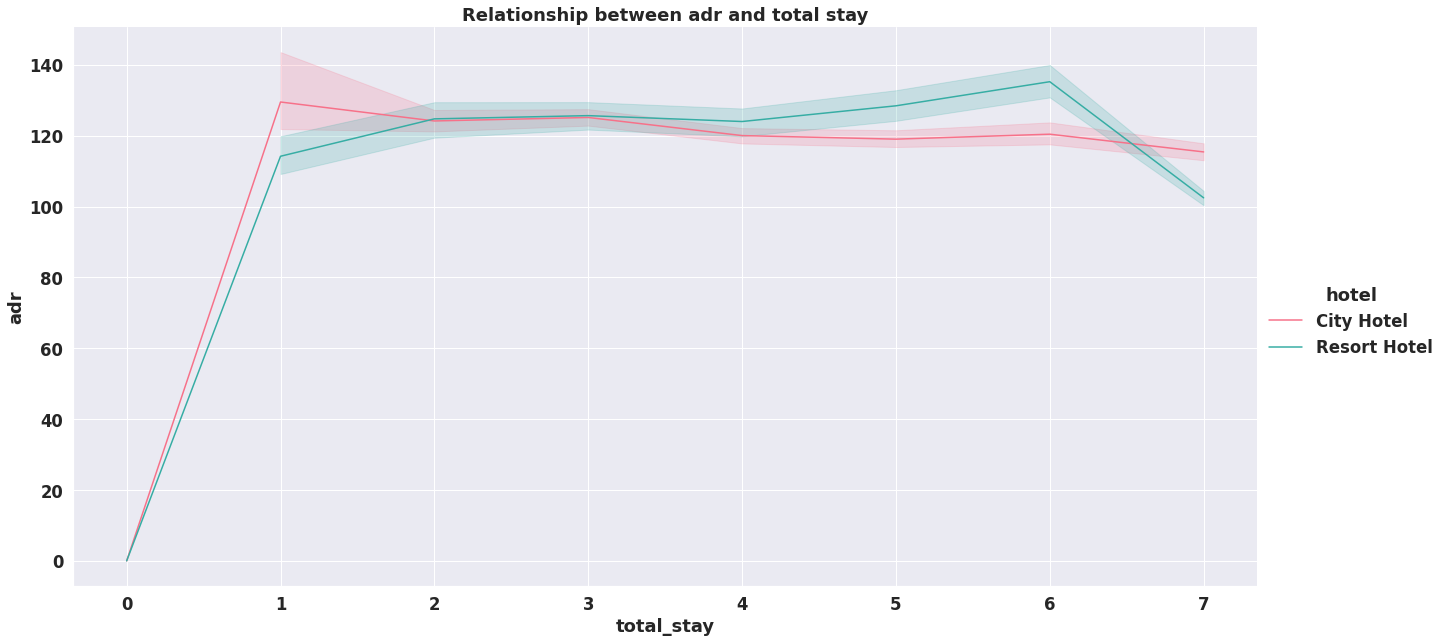

In [ ]:
#Visualisation
sns.relplot(data = df_1,x = 'total_stay',y = 'adr',kind = 'line',hue = 'hotel',palette = "husl",height = 9,aspect = 2)
plt.title('Relationship between adr and total stay')
plt.show()

As the total stay increases the  adr also increases.

#Correlation of the columns

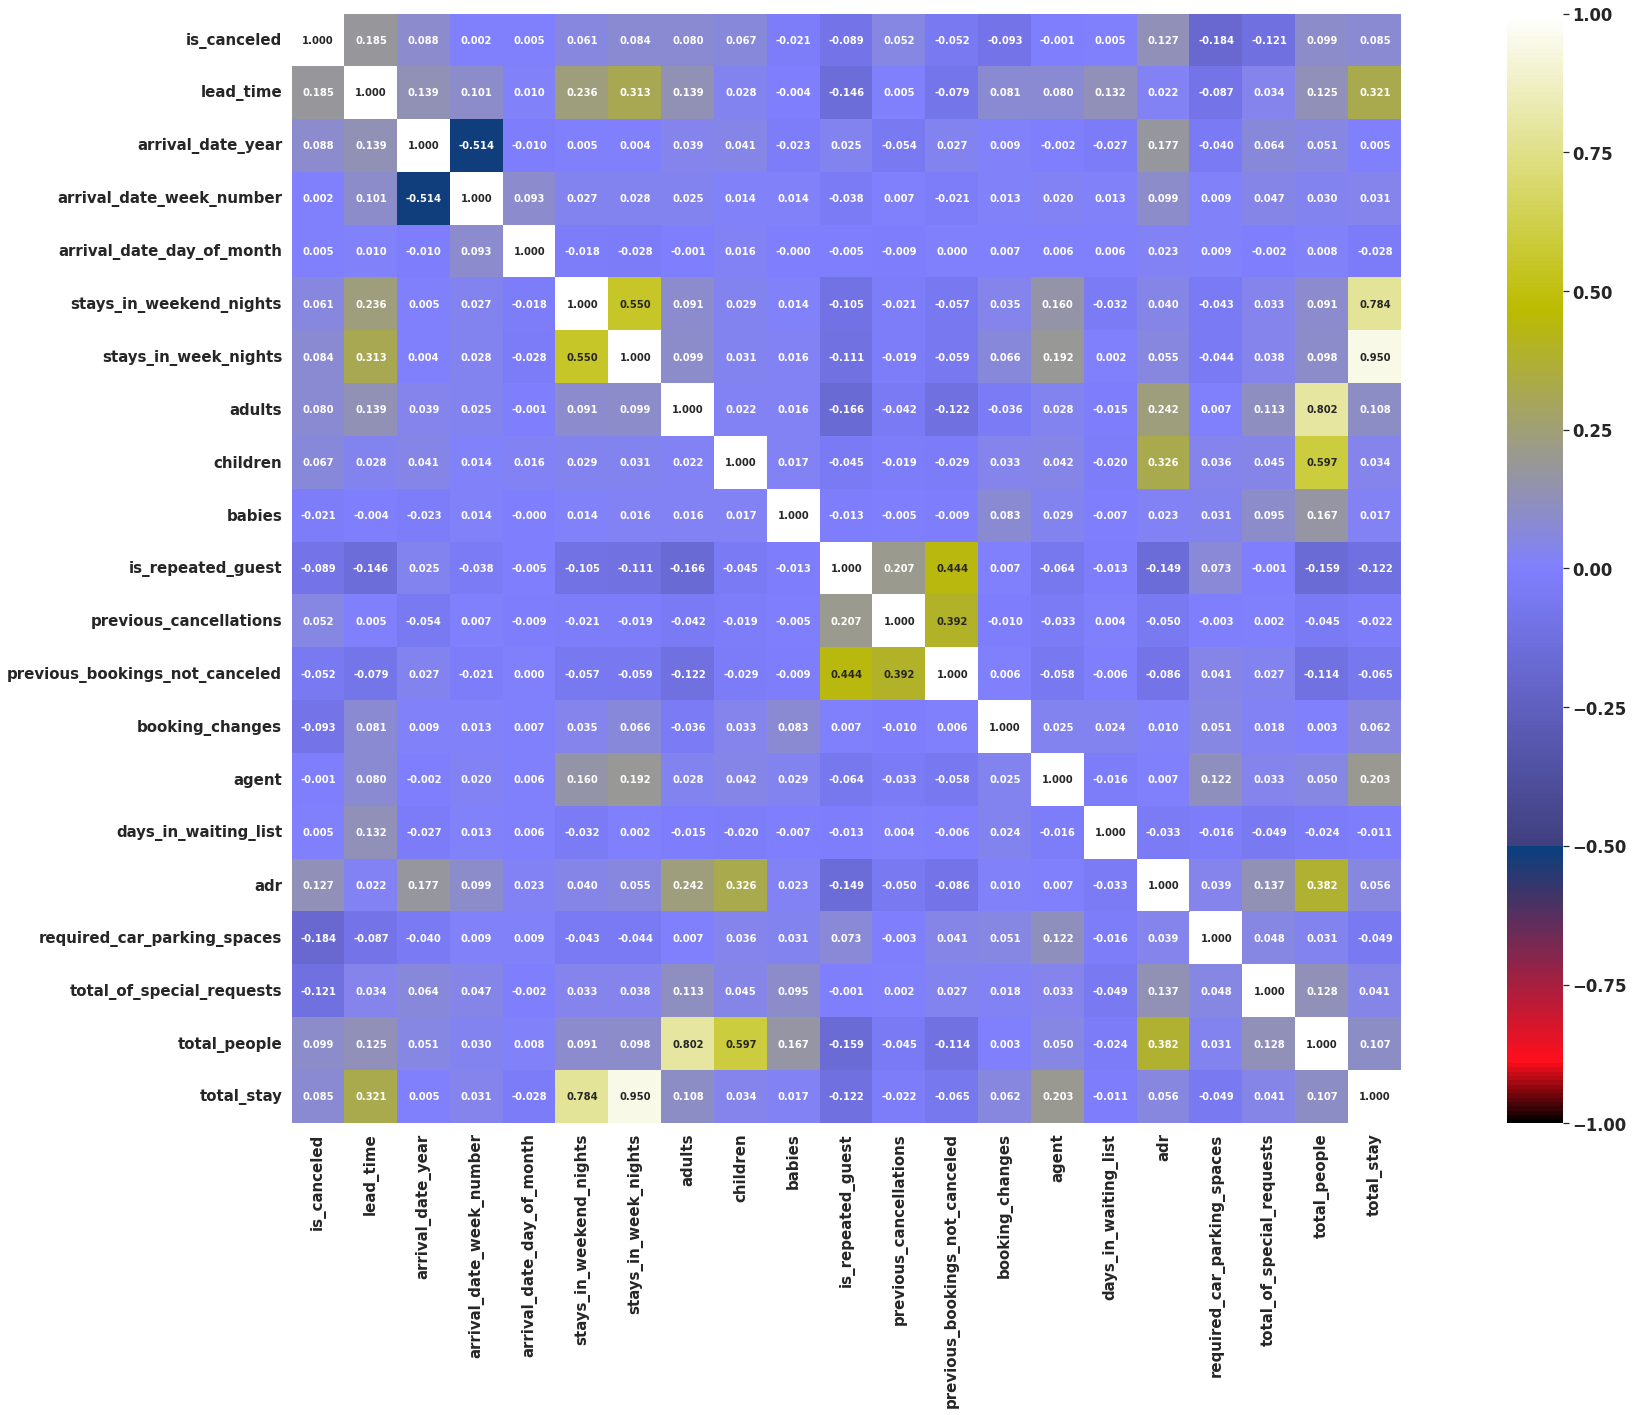

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


###1) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
###2)adults,childrens and babies are corelated to each other. That means more the people more will be adr.
###3) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

#ADR relationship with total number of people

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay'],
      dtype='object')

In [ ]:
# Filtering dataframe 
df_box = df[(df['adr'] < 500) & (df['total_people'] < 6)]

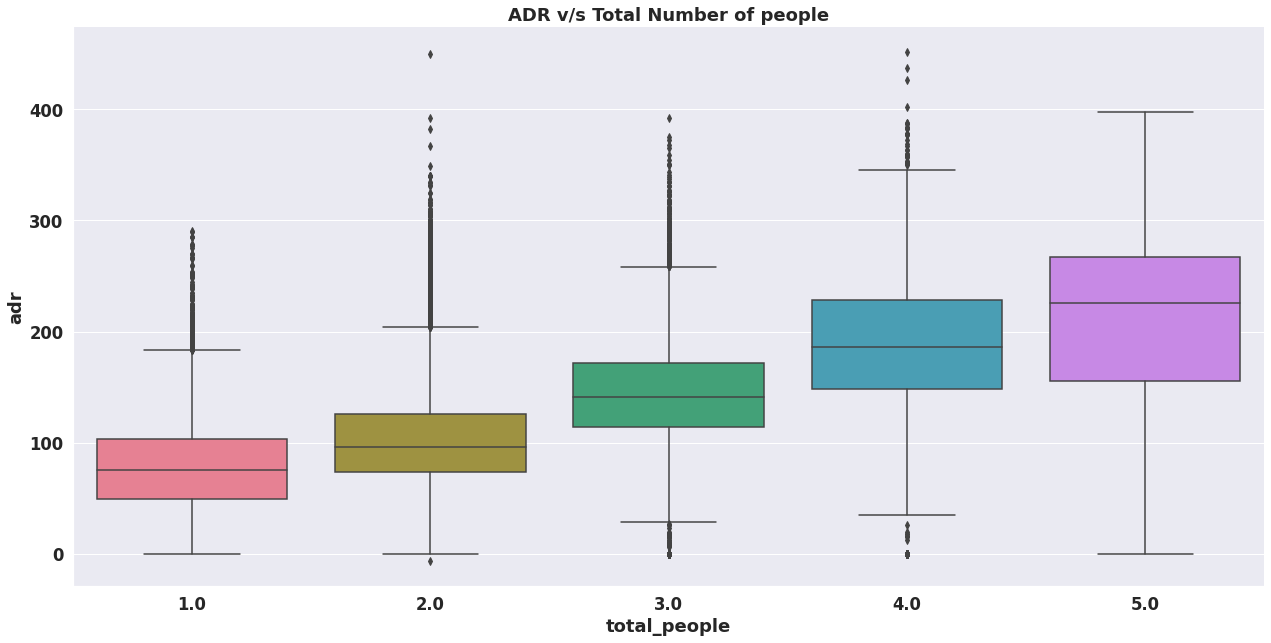

In [ ]:
# Visualisation
sns.catplot(data = df_box,x = 'total_people' , y = 'adr',kind = 'box',palette = "husl",height = 9,aspect = 2)
plt.title('ADR v/s Total Number of people')
plt.show()

###As the  total number of people increases adr also increases.
###Thus adr and total people are directly proportional to each other.

# **Conclusions:**

1.	City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.
2.	27.5 % bookings were got cancelled out of all the bookings.
3.	Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.
4.	The percentage of 0 changes made in the booking was more than 82 %.  Percentage of Single changes made was about 10%.
5.	Most of the customers (91.6%) do not require car parking spaces.
6.	79.1 % bookings were made through TA/TO (travel agents/Tour operators).
7.	BB( Bed & Breakfast) is the most preferred  type of meal by the guests. 
8.	Maximum number of guests were from Portugal, i.e. more than 25000 guests.
9.	Most of the bookings for City hotels and Resort hotel were happened in 2016.
10.	Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.
11.	Booking cancellation rate is high for City hotels which almost 30 %.
12.	Average lead time for resort hotel is high.
13.	Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.
14.	Resort hotels have the most repeated guests.
15.	Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.
16.	Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.
